# **MIRACLE7 E-Commerce Shipping Data Exploratory Data Analysis (EDA)**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
pal = sns.color_palette()

from sklearn.feature_selection import chi2
from scipy.stats import chi2_contingency

In [ ]:
url = 'https://raw.githubusercontent.com/salsmardhiyah/EcommerceShippingData/main/E-Commerce%20Shipping%20Data-Train.csv'
df = pd.read_csv(url)

## 1. Descriptive Statistics

A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai?

B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?

C. Apakah ada kolom yang memiliki nilai summary agak aneh? (min/mean/median/max/unique/top/freq) 

In [ ]:
df.info() # taking a look at info of the data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [ ]:
df.describe() # getting description of data

ID  Customer_care_calls  Customer_rating  Cost_of_the_Product  \
count  10999.00000         10999.000000     10999.000000         10999.000000   
mean    5500.00000             4.054459         2.990545           210.196836   
std     3175.28214             1.141490         1.413603            48.063272   
min        1.00000             2.000000         1.000000            96.000000   
25%     2750.50000             3.000000         2.000000           169.000000   
50%     5500.00000             4.000000         3.000000           214.000000   
75%     8249.50000             5.000000         4.000000           251.000000   
max    10999.00000             7.000000         5.000000           310.000000   

       Prior_purchases  Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
count     10999.000000      10999.000000   10999.000000         10999.000000  
mean          3.567597         13.373216    3634.016729             0.596691  
std           1.522860         16.205527    1635.377251             0.490584  
min           2.000000          1.000000    1001.000000             0.000000  
25%           3.000000          4.000000    1839.500000             0.000000  
50%           3.000000          7.000000    4149.000000             1.000000  
75%           4.000000         10.000000    5050.000000             1.000000  
max          10.000000         65.000000    7846.000000             1.000000

In [ ]:
# pengelompokan kolom untuk variabel kategorik
cats = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']
df[cats].describe()

Warehouse_block Mode_of_Shipment Product_importance Gender
count            10999            10999              10999  10999
unique               5                3                  3      2
top                  F             Ship                low      F
freq              3666             7462               5297   5545

In [ ]:
# Ratio of delayed (1) and not delayed orders (0)
df['Reached.on.Time_Y.N'].value_counts() / df['Reached.on.Time_Y.N'].count()

1    0.596691
0    0.403309
Name: Reached.on.Time_Y.N, dtype: float64

In [ ]:
# Percentage of delayed (1) and not delayed orders (0)
df['Reached.on.Time_Y.N'].value_counts() / df['Reached.on.Time_Y.N'].count() *100

1    59.669061
0    40.330939
Name: Reached.on.Time_Y.N, dtype: float64

In [ ]:
df = df.drop('ID', axis=1)

In [ ]:
# Print some information about the data
print("Missing values:", df.isna().sum().sum())
print("Categorical features:", len(df.select_dtypes('object').columns))
print("Numerical features:", len(df.select_dtypes('number').columns))

Missing values: 0
Categorical features: 4
Numerical features: 7


Jawaban:

A. Kolom Reached.on.Time_Y.N seharusnya data type nya adalah object (boolean) karena variabel tersebut merupakan data kategorik yang mengartikan nilai 1 adalah no dan nilai 0 adalah yes.

B. Tidak ada kolom yang memiliki nilai kosong, dapat dilihat dari output di atas bahwa seluruh kolom memiliki jumlah baris yang sama dengan jumlah data yaitu 10.999 baris/data.

C. Kolom yang memiliki summary aneh: 
1. Kolom Weight in gms memiliki selisih nilai mean dan median yang cukup jauh yaitu sebesar 515 yang mengartikan bahwa variabel tersebut memiliki outlier/pencilan.
2. Kolom Mode_of_Shipment memiliki distribusi yang terlalu timpang karena nilai kategori Ship mendominasi, hal tersebut menyebabkan feature tidak akan terlalu berguna dalam klasifikasi 

## **2. Univariate Analysis**

### **Bar Plots based on Features (Categorical Data)**

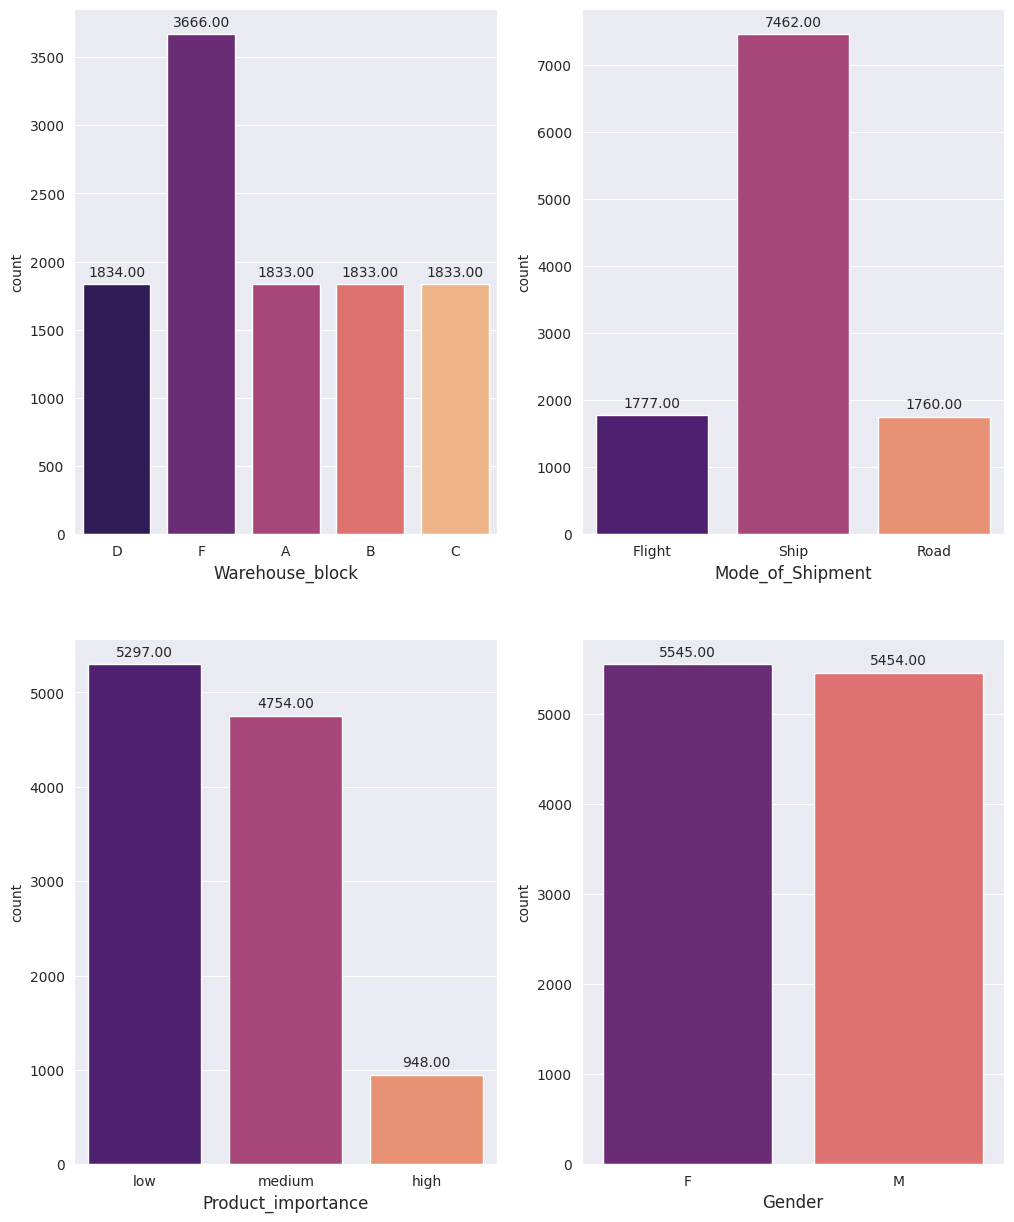

In [ ]:
dfcategory = df.select_dtypes(include = 'object')
fig,ax= plt.subplots(nrows=2,ncols=2,figsize=(12, 15)) 
for value, subplot in zip(dfcategory.columns,ax.flatten()):
    plotting = sns.countplot(x = dfcategory[value],ax=subplot,palette='magma' )
    plotting.set_xlabel(value, fontsize = 12)
    plotting.set_xticklabels(plotting.get_xticklabels())
    
    for p in plotting.patches:
        plotting.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
           xytext = (0, 6), textcoords = 'offset points')

plt.show()

- Warehouse Block: Persebaran pesanan pada blok A, B, C, D cukup merata sementara blok F memiliki jumlah pesanan yang jauh lebih besar yg bisa mencapai kurang lebih 2x lipat pesana di blok yang lain.

- Mode of Shipment : Mode pengirimin mengggunakan tarnsaportasi udara dan darat memiliki jumlah yang serupa sementara moda pengiriminan menggunakan transporatsi laut memiliki jumlah yang jauh lebih besar yaitu mencapai 4 x lipat dari moda pengiriman lainnya.

- Product Importance: low imporatnce dan medium importance menjadi data yg mayoritas sedangkan high importance menjadi data yg minoritas

- Gender: Kedua kelas seimbang.


### **Bar Plot based on Features (Categorical Data) viewed by Reached on time or not (Target Variable)**

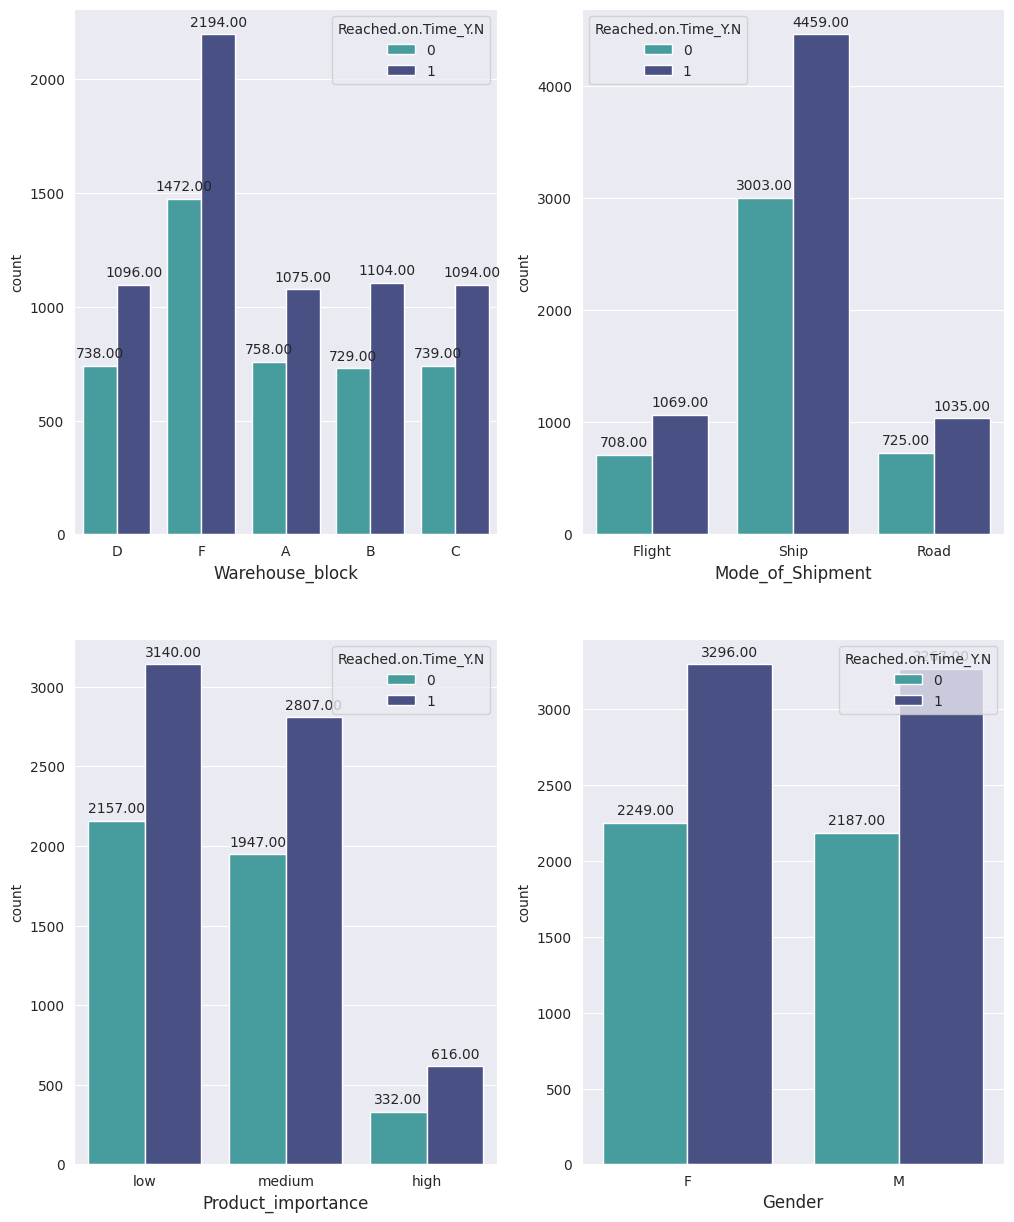

In [ ]:
dfcategory = df.select_dtypes(include = 'object')
fig,ax= plt.subplots(nrows=2,ncols=2,figsize=(12, 15)) 
for value, subplot in zip(dfcategory.columns,ax.flatten()):
    plotting = sns.countplot(x = dfcategory[value],ax=subplot,palette='mako_r', hue = df['Reached.on.Time_Y.N'] )
    plotting.set_xlabel(value, fontsize = 12)
    plotting.set_xticklabels(plotting.get_xticklabels())
    
    for p in plotting.patches:
        plotting.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
           xytext = (0, 6), textcoords = 'offset points')

plt.show()

<ipython-input-13-9f4219d9b051>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plotting.set_xticklabels(plotting.get_xticklabels())
<ipython-input-13-9f4219d9b051>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plotting.set_xticklabels(plotting.get_xticklabels())
<ipython-input-13-9f4219d9b051>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plotting.set_xticklabels(plotting.get_xticklabels())
<ipython-input-13-9f4219d9b051>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plotting.set_xticklabels(plotting.get_xticklabels())


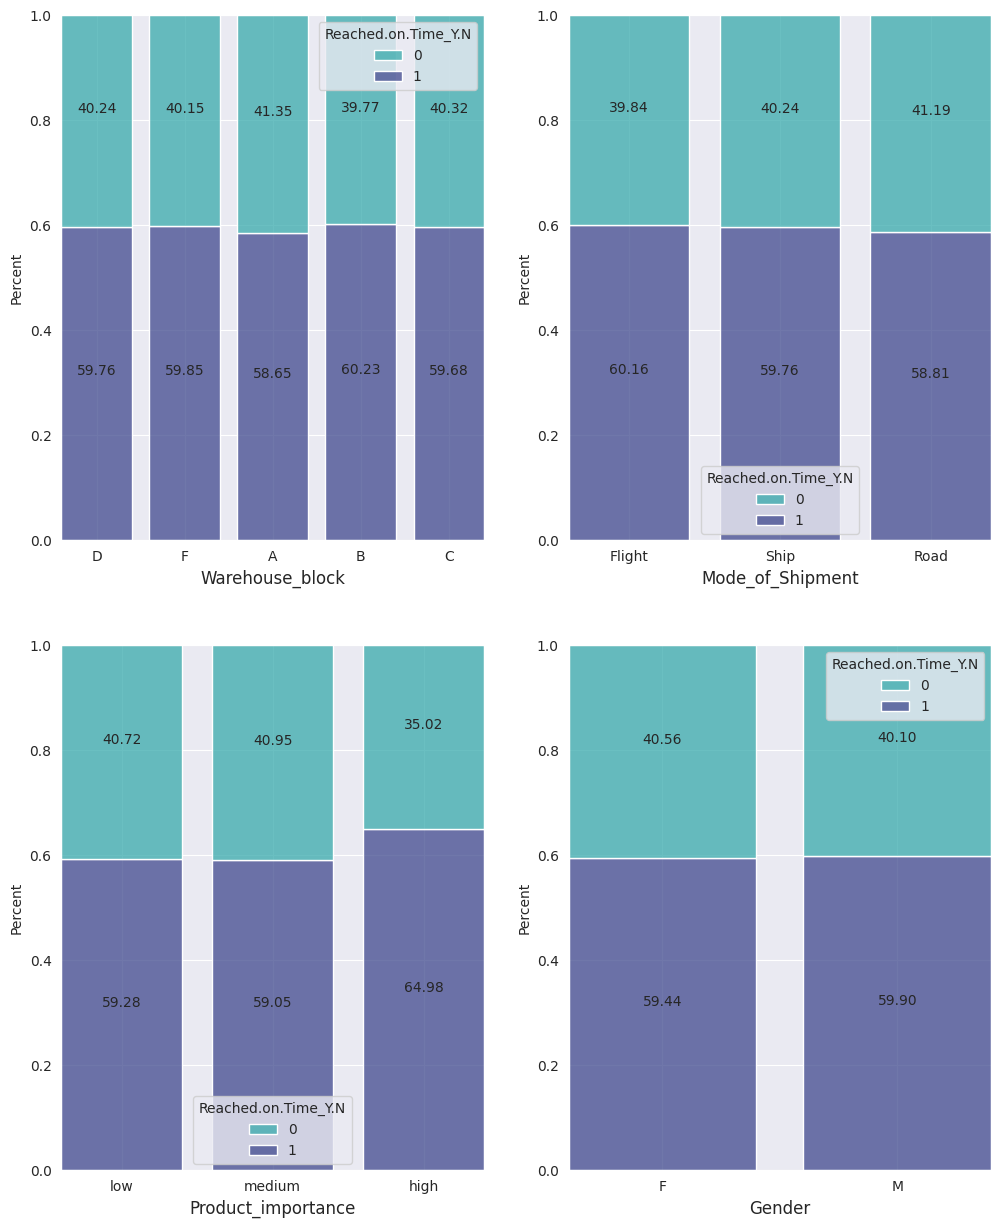

In [ ]:
dfcategory = df.select_dtypes(include = 'object')
fig,ax= plt.subplots(nrows=2,ncols=2,figsize=(12, 15)) 
for value, subplot in zip(dfcategory.columns,ax.flatten()):
    plotting = sns.histplot(x = dfcategory[value],ax=subplot,palette='mako_r', hue = df['Reached.on.Time_Y.N'],multiple="fill", stat="percent",
    discrete=True, shrink=.8 )
    plotting.set_xlabel(value, fontsize = 12)
    plotting.set_xticklabels(plotting.get_xticklabels())
    
    for p in plotting.patches:
        plotting.annotate(format(p.get_height()*100, '.2f'), (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height()/2), ha = 'center',
           xytext = (0, 6), textcoords = 'offset points')

plt.show()

- Sekitar 68% keterlambatan pengiriman disebabkan karena kapal digunakan sebagai moda pengiriman. Jadi, opsi alternatif seperti layanan Penerbangan dan Jalan dapat dipertimbangkan untuk mengurangi keterlambatan pengiriman

- Persentase pengiriman tertunda yang lebih tinggi dicatat di Gudang blok F sebesar 33%.

- Pemberian rating oleh pelanggan miliki sebaran data yang mirip. Hampir 20% dari total pengiriman menerima rating 5

### **Distribution of Features (Numerical Data)**

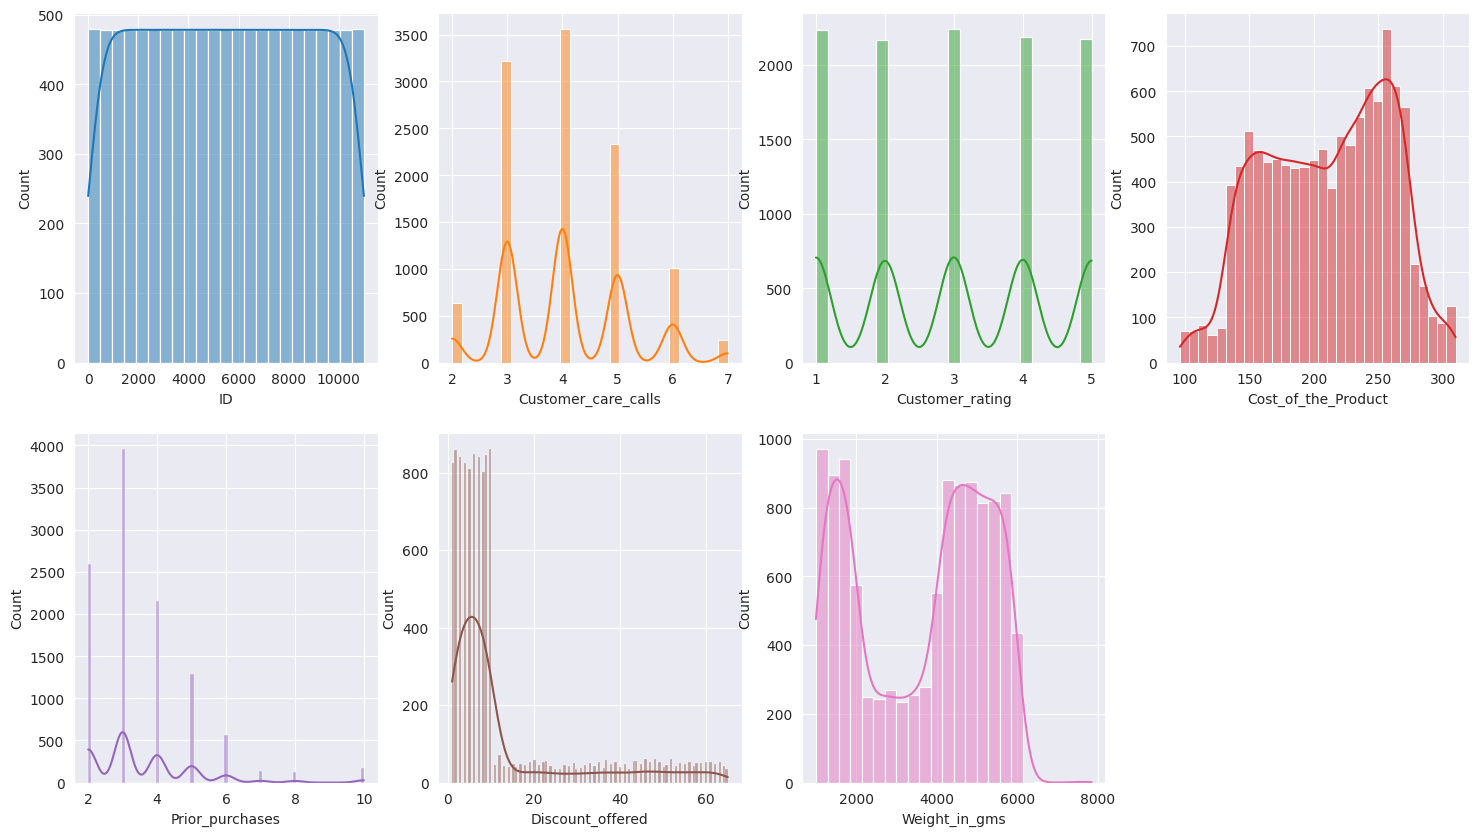

In [ ]:
# Display value distributions
plt.figure(figsize=(18, 10))

num_features = df.select_dtypes('number').drop('Reached.on.Time_Y.N', axis=1).columns.values

for i, num in enumerate(num_features):

    plt.subplot(2, 4, i+1)
    sns.histplot(df[num], color=pal[i], kde=True)
    
plt.show()

- Customer Care Calls: Distribusi positively skewed dengan modus 4.

- Customer Rating:uniform distribution.

- Cost of the product:

- Prior purchases: Positively skewed dengan modus 3.

- Discount Offered: Dipisahkan menjadi 2 uniform distribution: 0 hingga 10 merupakan nilai mayoritas dan kemudian nilai minoritas lebih besar dari 10 hingga 65.

- Weight in gms: terbagi jadi 3 zona: tinggi dari 1000 hingga 2000 dan dari 4000 hingga 6000. Rendah dari 2000 hingga 4000.

### **BOX PLOT**

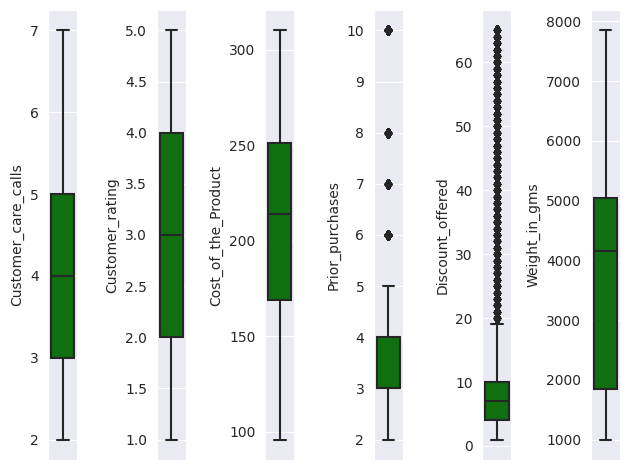

In [ ]:
for i in range(0, len(num_features)):
    plt.subplot(1, len(num_features), i+1)
    sns.boxplot(y=df[num_features[i]], color='green', orient='v')
    plt.tight_layout()

**Preprocessing Recommendation**
- Handling Missing Data
  - Tidak ada missing value pada dataset ini

- Handling Duplicated Data
  - Tidak terdapat duplicated data pada dataset ini

- Handling Outliers
  - Feature `Discount_Offered` dan `Prior_purchase` memiliki data outlier di sebelah kanan. Rekomendasi penanganan outlier untuk fitur ini berdasarkan z score karena fitur memiliki data outlier yang banyak sehingga jika menggunakan nilai IQR akan menghapus baris data terlalu banyak.

- Feature Transformation
  - Diketahui Feature Cost_of_product` dan `Weight_in_gms` memiliki distribusi tidak normal dan bukan right skewed, sehingga direkomendasikan menggunakan transformasi standardization dapat merubah sebaran data mendekati distribusi normal
  - Diketahui Feature `Discount_offered` dan `Prior_purchase` memiliki distribusi right skewed sehingga dengan menggunakan log transformation diharapkan dapat merubah bentuk sebaran data mendekati normal

- Feature Encoding
  - Feature `Gender` dan `Product_importance` direkomendasikan untuk dilakukan encoding menggunakan Label Encoding. Hal ini didasari karakteristik Feature `Gender` yang memiliki jumlah distinct values (F & M), sedangkan Feature `Product_importance` memiliki tipe values ordinal (low, medium, high)
  - Feature `Warehouse_block` dan `Mode_of_shipment` direkomendasikan untuk dilakukan encoding menggunakan One Hot Encoding. Hal ini didasari karakteristik Feature `Warehouse_block` dan `Mode_of_shipment` memiliki distinct values lebih dari dua namun tidak berjenis ordinal

- Class Imbalance
  - Distribusi nilai unik pada fitur target `Reached.on.Time_Y.N` yaitu sebanyak 60% data '1' dan 40% data '0' sehingga masuk pada Imbalance Data dengan kategori Mild (20-40%). Untuk mengatasi class imbalance pada dataset ini direkomendasikan menggunakan algoritma oversampling SMOTE sehingga data sintetis dapat dibuat di antara kelas minoritas menggunakan interpolasi antar titik-titik data.

## **3. Multivariate Analysis**

### **CORRELATION**

In [ ]:
df.corr(method = 'kendall')

<ipython-input-16-e65780310510>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method = 'kendall')


Customer_care_calls  Customer_rating  \
Customer_care_calls             1.000000         0.009632   
Customer_rating                 0.009632         1.000000   
Cost_of_the_Product             0.224405         0.007486   
Prior_purchases                 0.217438         0.008550   
Discount_offered               -0.079353        -0.001728   
Weight_in_gms                  -0.172928        -0.003562   
Reached.on.Time_Y.N            -0.058363         0.011724   

                     Cost_of_the_Product  Prior_purchases  Discount_offered  \
Customer_care_calls             0.224405         0.217438         -0.079353   
Customer_rating                 0.007486         0.008550         -0.001728   
Cost_of_the_Product             1.000000         0.140056         -0.079716   
Prior_purchases                 0.140056         1.000000         -0.071276   
Discount_offered               -0.079716        -0.071276          1.000000   
Weight_in_gms                  -0.094513        -0.172384         -0.216055   
Reached.on.Time_Y.N            -0.058845        -0.067473          0.281408   

                     Weight_in_gms  Reached.on.Time_Y.N  
Customer_care_calls      -0.172928            -0.058363  
Customer_rating          -0.003562             0.011724  
Cost_of_the_Product      -0.094513            -0.058845  
Prior_purchases          -0.172384            -0.067473  
Discount_offered         -0.216055             0.281408  
Weight_in_gms             1.000000            -0.217190  
Reached.on.Time_Y.N      -0.217190             1.000000

<ipython-input-88-e569c68e6bd2>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method='pearson'), annot = True, fmt = '0.2f', annot_kws = {'size' : 15}, linewidth = 5, linecolor = 'orange', cmap = 'Reds')


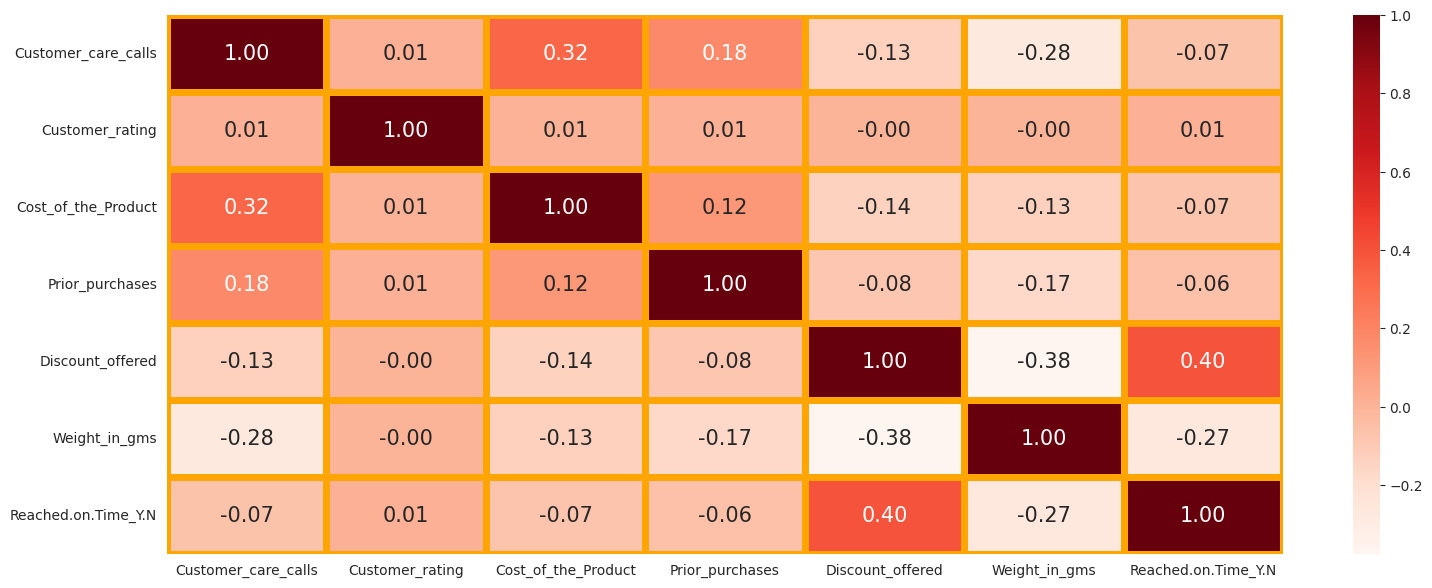

In [ ]:
# heatmap of the data for checking the correlation between the features and target column.

plt.figure(figsize = (18, 7))
sns.heatmap(df.corr(method='pearson'), annot = True, fmt = '0.2f', annot_kws = {'size' : 15}, linewidth = 5, linecolor = 'orange', cmap = 'Reds')
plt.show()

<ipython-input-17-b2bad00e5496>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method='kendall'), annot = True, fmt = '0.2f', annot_kws = {'size' : 15}, linewidth = 5, linecolor = 'orange', cmap = 'Reds')


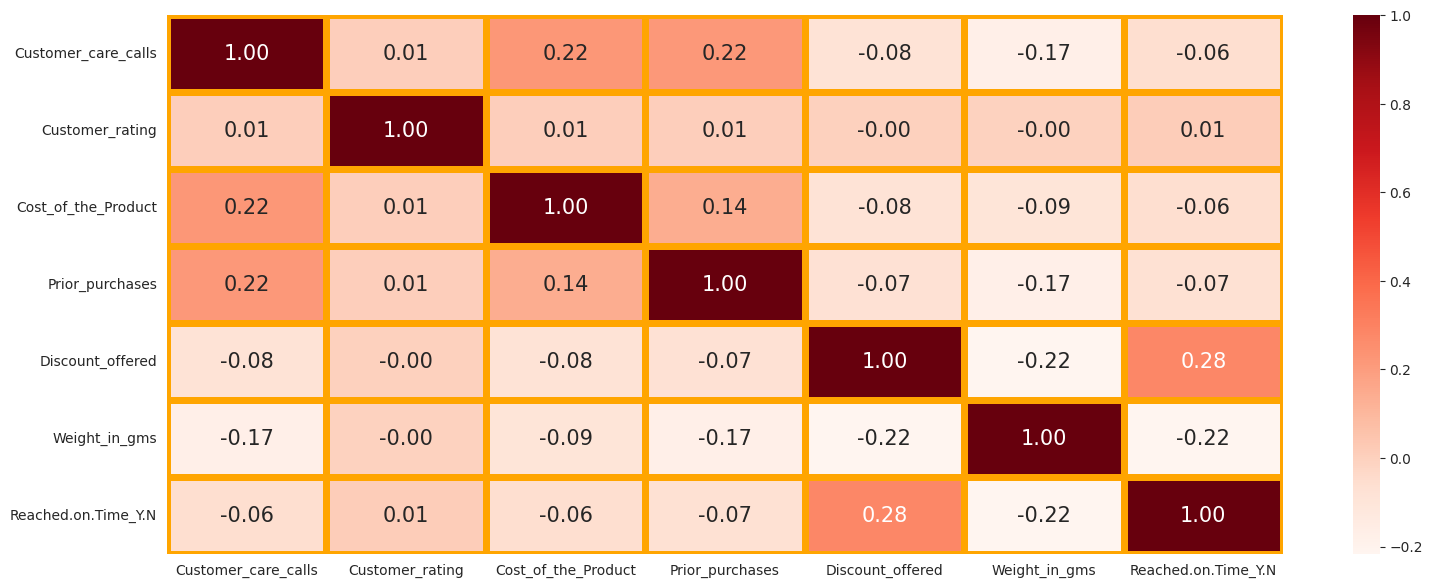

In [ ]:
# heatmap of the data for checking the correlation between the features and target column.

plt.figure(figsize = (18, 7))
sns.heatmap(df.corr(method='kendall'), annot = True, fmt = '0.2f', annot_kws = {'size' : 15}, linewidth = 5, linecolor = 'orange', cmap = 'Reds')
plt.show()

- Insight yang menarik dapat dilihat bahwa discount dan ketepatan waktu sampainya barang saling berkorelasi, dimana semakin besar discount yang ditawarkan semakin tinggi kemungkinan barang samapi tidak tepat waktu.

- Biaya produk dan panggilan layanan pelanggan saling berkorelasi, dimana jika pelanggan kita membayar lebih banyak uang untuk produk, mereka cenderung memiliki lebih banyak melakukan customer care calls.

**Conlusion:**
1. Berdasarkan hasil korelasi di atas dapat disimpulkan bahwa variabel Weight in Grams dan Discount Offered dapat paling relevan dan dapat dipertahankan karena memiliki nilai korelasi > 0.2 sedangkan variabel lainnya memiliki korelasi yang sangat lemah dengan r < 0.1 sehingga variabel lainnya dapat didrop.
2. Korelasi antar feature tidak ada 2 feature yang berkorelasi kuat atau > 0.7 sehingga tidak ada feature yang redundan yang mengartikan bahwa data tidak memiliki masalah multikolinearitas.

### **PAIR PLOT**


<Figure size 1500x1500 with 0 Axes>

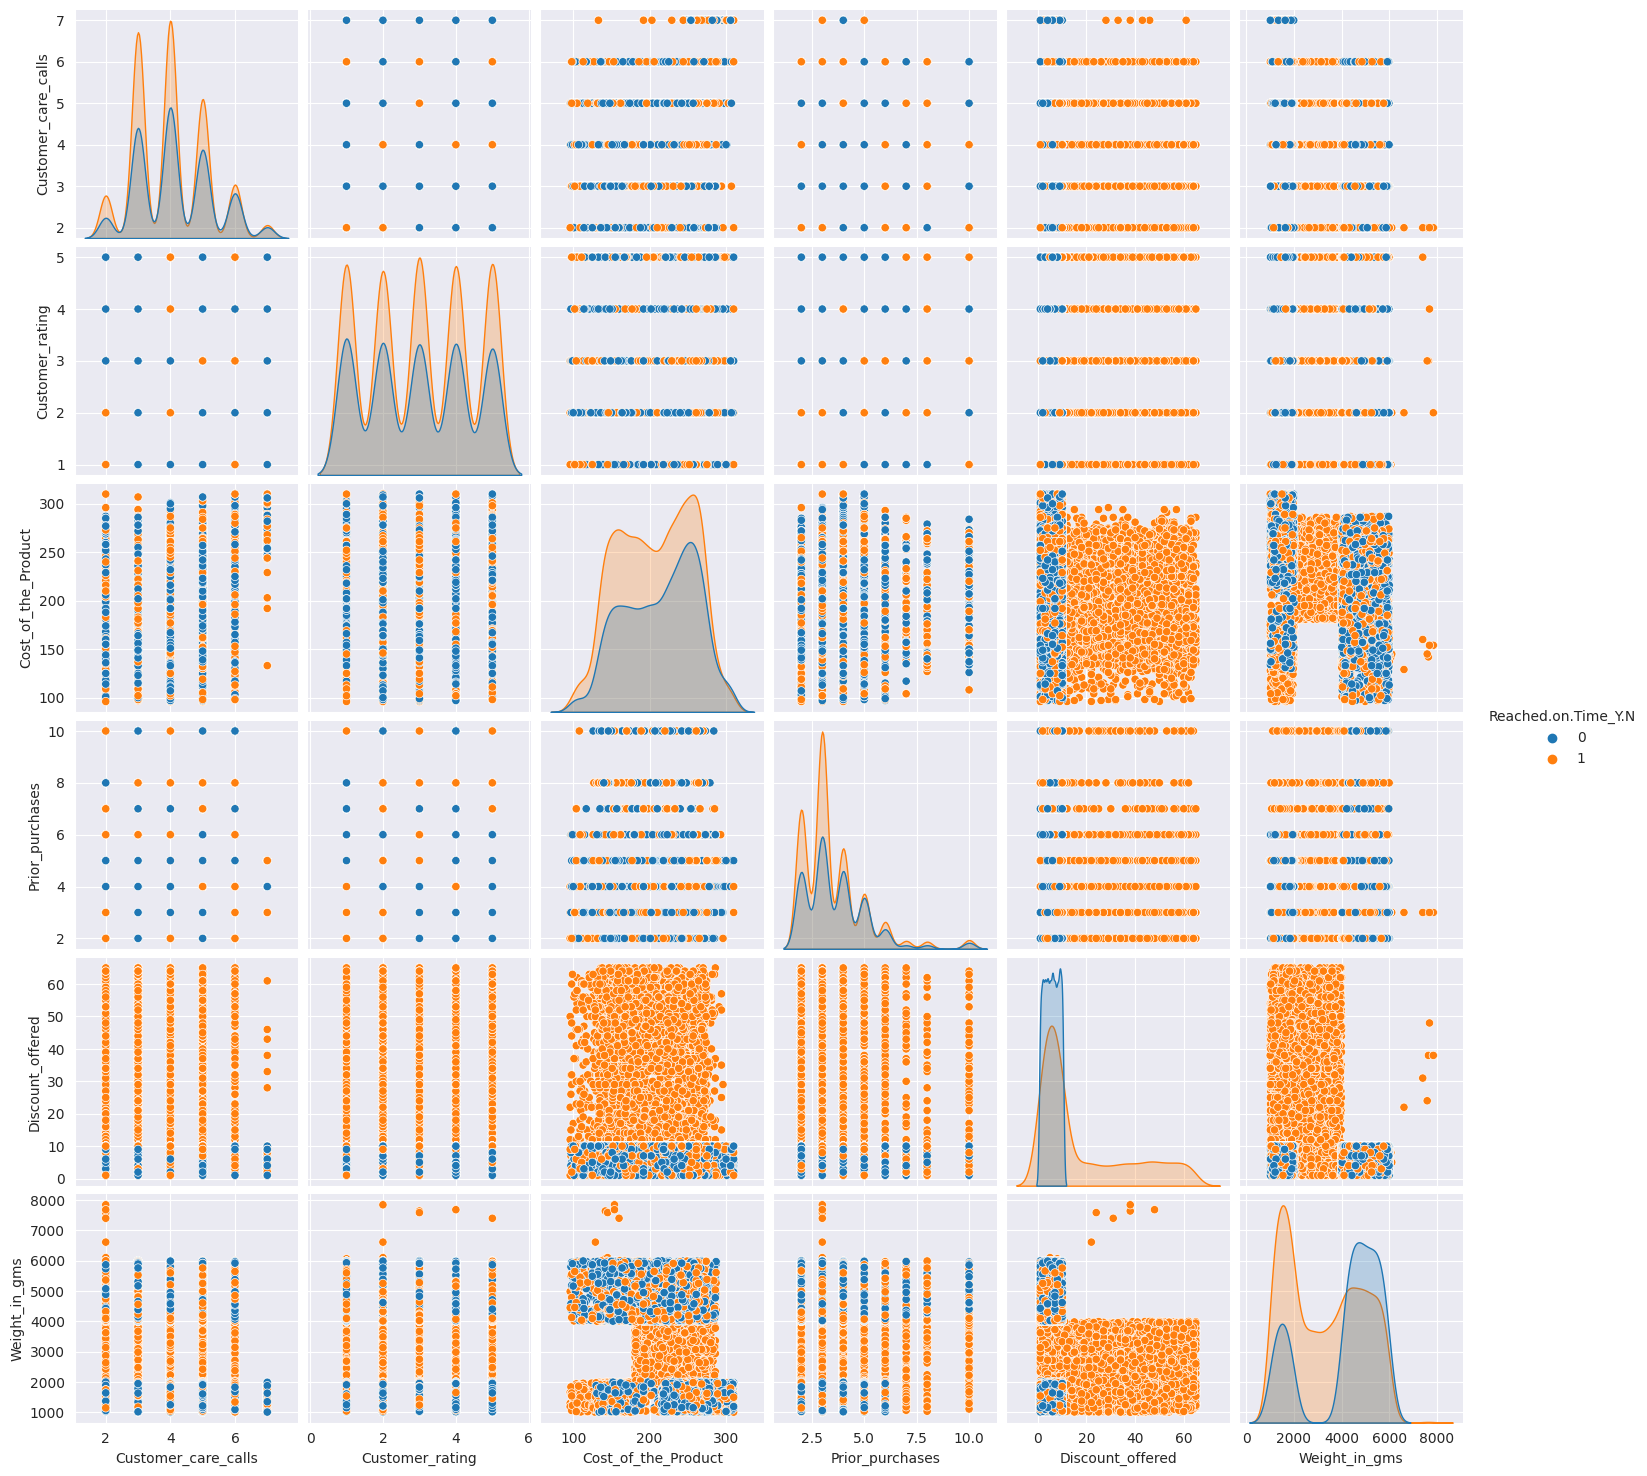

In [ ]:
plt.figure(figsize=(15, 15))
sns.pairplot(df, diag_kind='kde', hue='Reached.on.Time_Y.N')

**Conclusion:**

- Berdasarkan Pair Plot di atas dapat dilihat bahwa pada scatter plot variabel discount_offered terlihat pattern yang sangat jelas terpisah antara yang tepat waktu dan tidak tepat waktu. Pada discount >10% seluruhnya tidak tepat waktu. Sehingga Discount offered dapat menjadi concern dalam perbaikan variabel Reached on Time. 

- Berdasarkan Pair Plot di atas dapat dilihat bahwa pada scatter plot variabel Weight in Grams terlihat pattern yang sangat jelas terpisah antara yang tepat waktu dan tidak tepat waktu. Pada Weight rentang 2000 - 4000 gram di hampir seluruh pesanan datang tidak tepat waktu. Sehingga Weight in Grams dapat menjadi concern dalam perbaikan variabel Reached on Time.


**Preprocessing Recommendation**
- Feature Selection
  - Feature `ID` akan didrop karena memiliki kardinalitas yang tinggi. 
  - Berdasarkan uji Chi Square, Feature `Product_importance` memiliki pengaruh terhadap variabel target 
  - Berdasarkan uji korelasi  Kendall Tau, Feature `Weight_in_gms` dan `Discount_offer` memiliki korelasi dengan variable target 
  - Feature selain `Product_importance`, `Weight_in_gms` dan `Discount_offer` direkomendasikan untuk didrop karena tidak memiliki pengaruh terhadap variabel target

### **STRIP PLOTS**

In [ ]:
categorical_columns = df.select_dtypes(include = 'object').columns
numerical_columns = df.select_dtypes('number').drop(['Reached.on.Time_Y.N'], axis=1).columns.values

#### All Features (Numerical Data) to Warehouse_block Variable

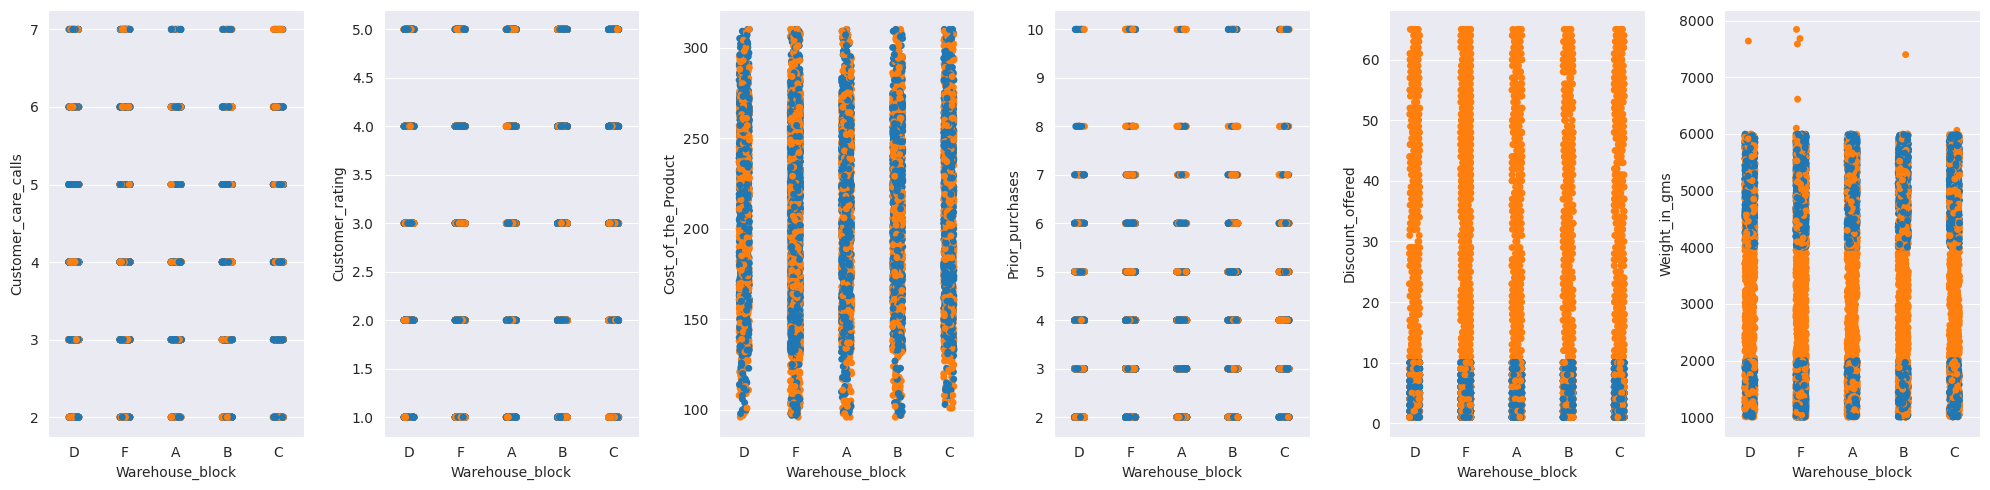

In [ ]:
# create strip plot for each categorical feature ['Warehouse_block']
fig = plt.figure(figsize=(20, 5))

for i in range(0, len(numerical_columns)):
    ax = fig.add_subplot(1, len(numerical_columns), i+1)
    sns.stripplot(ax=ax, data=df, x=categorical_columns[0], y=numerical_columns[i], hue='Reached.on.Time_Y.N', legend=False)
    plt.tight_layout()

#### All Features (Numerical Data) to Mode_of_Shipment Variable

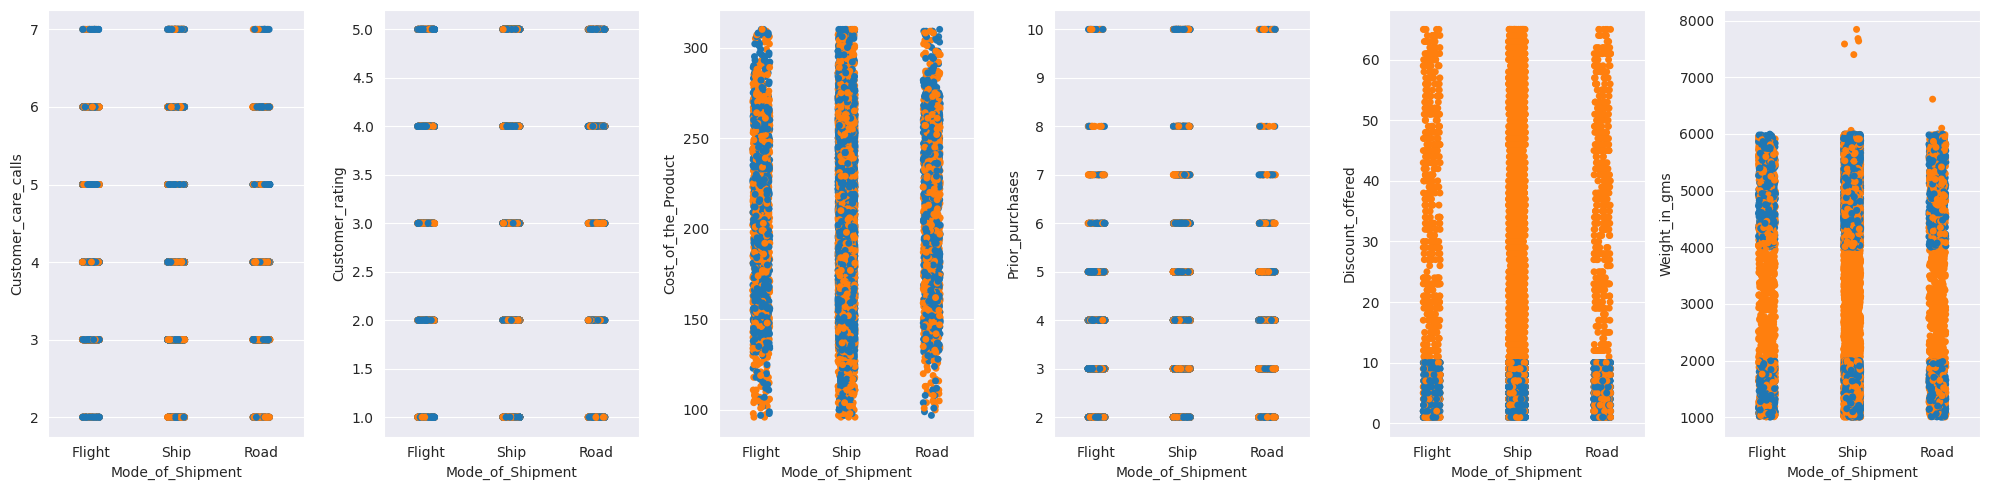

In [ ]:
# create strip plot for each categorical feature ['Mode_of_Shipment']
fig = plt.figure(figsize=(20, 5))

for i in range(0, len(numerical_columns)):
    ax = fig.add_subplot(1, len(numerical_columns), i+1)
    sns.stripplot(ax=ax, data=df, x=categorical_columns[1], y=numerical_columns[i], hue='Reached.on.Time_Y.N', legend=False)
    plt.tight_layout()

#### All Features (Numerical Data) to Product_importance Variable

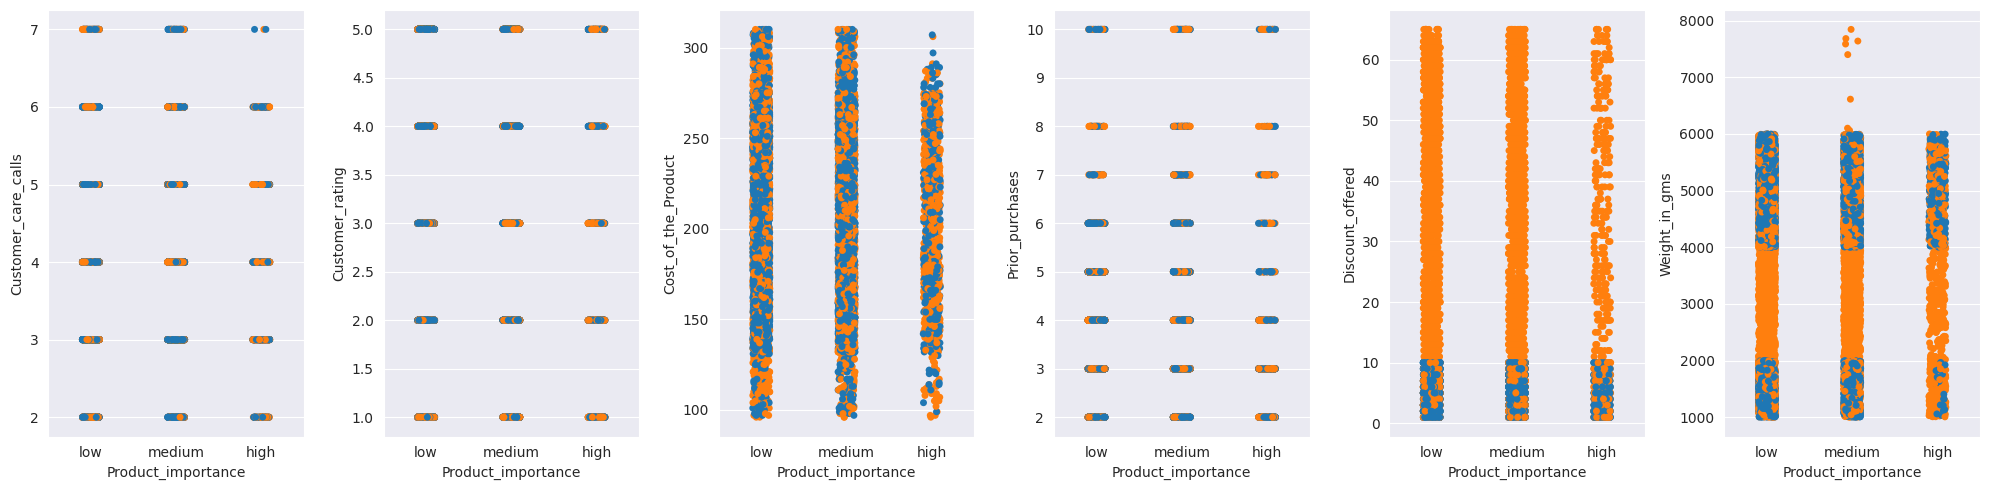

In [ ]:
# create strip plot for each categorical feature ['Product_importance']
fig = plt.figure(figsize=(20, 5))

for i in range(0, len(numerical_columns)):
    ax = fig.add_subplot(1, len(numerical_columns), i+1)
    sns.stripplot(ax=ax, data=df, x=categorical_columns[2], y=numerical_columns[i], hue='Reached.on.Time_Y.N', legend=False)
    plt.tight_layout()

#### All Features (Numerical Data) to Gender Variable

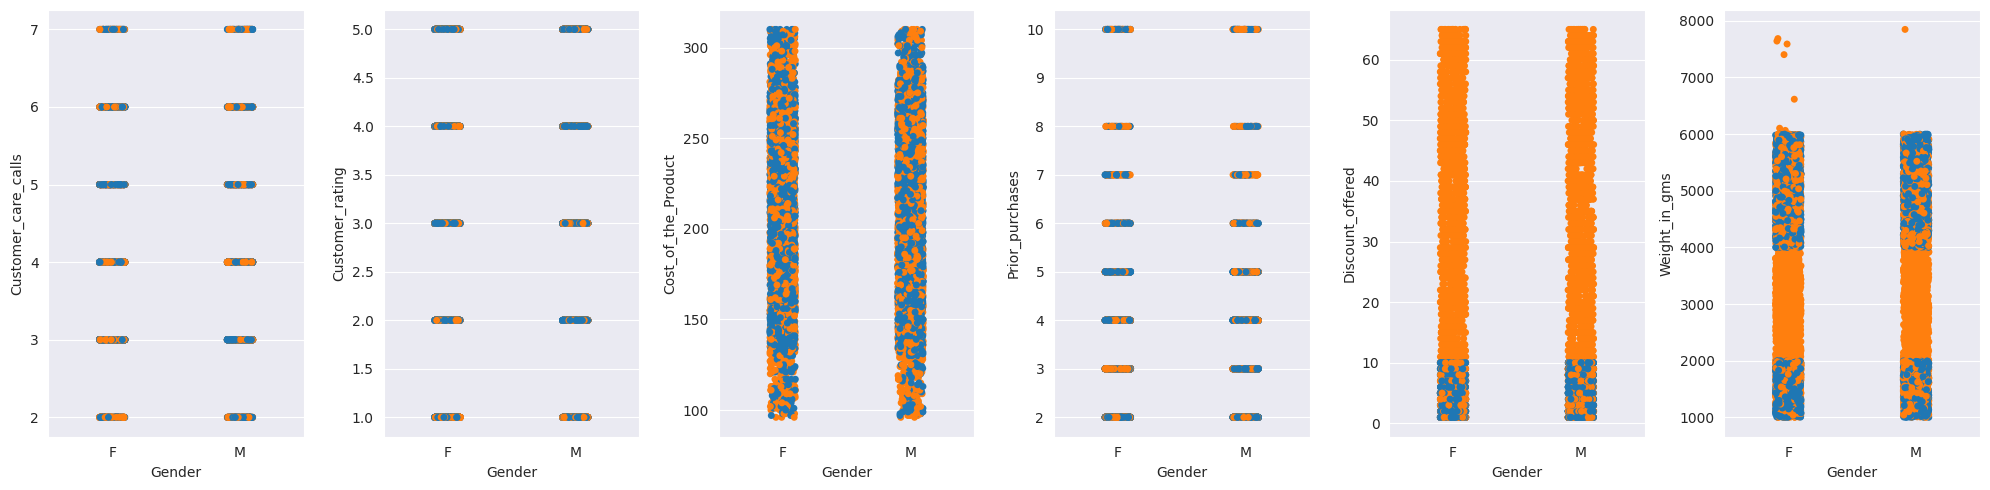

In [ ]:
# create strip plot for each categorical feature ['Gender']
fig = plt.figure(figsize=(20, 5))

for i in range(0, len(numerical_columns)):
    ax = fig.add_subplot(1, len(numerical_columns), i+1)
    sns.stripplot(ax=ax, data=df, x=categorical_columns[3], y=numerical_columns[i], hue='Reached.on.Time_Y.N', legend=False)
    plt.tight_layout()

#### All Features (Numerical Data) to Reached.on.Time__Y.N Variable (as Target Variable)

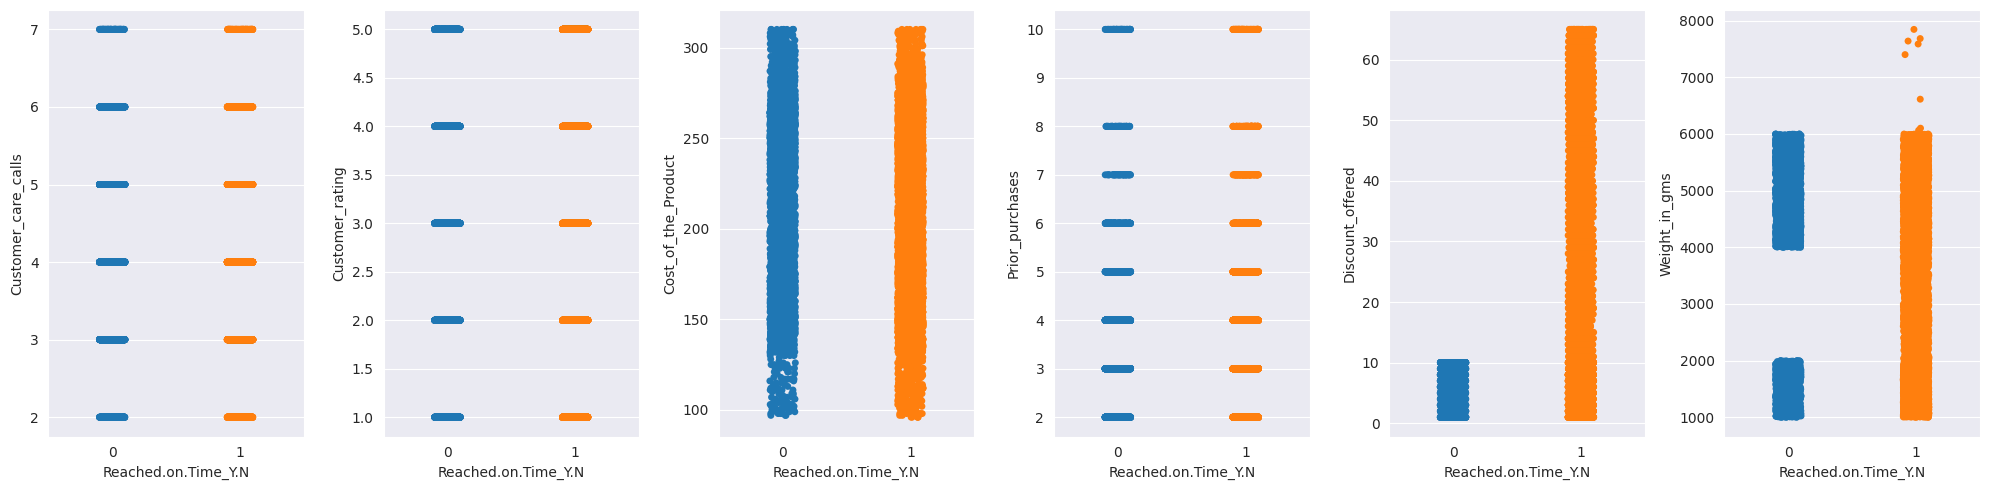

In [ ]:
# create strip plot for each categorical feature ['Reached.on.Time_Y.N']
fig = plt.figure(figsize=(20, 5))

for i in range(0, len(numerical_columns)):
    ax = fig.add_subplot(1, len(numerical_columns), i+1)
    sns.stripplot(ax=ax, data=df, x='Reached.on.Time_Y.N', y=numerical_columns[i], hue ='Reached.on.Time_Y.N',  legend=False)
    plt.tight_layout()

**Conclusion:**

- Berdasarkan Strip Plot di atas dapat dilihat bahwa hubungan variabel discount_offered dengan setiap fitur kategorik terlihat pattern yang sangat jelas terpisah antara yang tepat waktu dan tidak tepat waktu. Pada discount >10% seluruhnya tidak tepat waktu. Sehingga Discount offered dapat menjadi concern dalam perbaikan variabel Reached on Time. 

- Berdasarkan Strip Plot di atas dapat dilihat bahwa hubungan variabel Weight in Grams dengan setiap fitur kategorik terlihat pattern yang sangat jelas terpisah antara yang tepat waktu dan tidak tepat waktu. Pada Weight rentang 2000 - 4000 gram di hampir seluruh pesanan datang tidak tepat waktu. Sehingga Weight in Grams dapat menjadi concern dalam perbaikan variabel Reached on Time.

### **CHI-SQUARE TEST**

**Hypothesis**

H0 : There is no relationship between Predictor Variable and Target Variable

H1 : There is a relationship between Predictor Variable and Target Variable

In [ ]:
def chi2(df, col1, col2):    
    #---create the contingency table---
    df_crosstab= pd.crosstab(index = df[col1], columns = df[col2])
    
    #---calculate degree of freedom---
    degree_f = (df_crosstab.shape[0]-1) * (df_crosstab.shape[1]-1)
    
    #---sum up the totals for row and columns---
    df_crosstab.loc[:,'Total']= df_crosstab.sum(axis=1)
    df_crosstab.loc['Total']= df_crosstab.sum()
    
    #---create the expected value dataframe---
    df_exp = df_crosstab.copy()    
    df_exp.iloc[:,:] = np.multiply.outer(
        df_crosstab.sum(1).values,df_crosstab.sum().values) / df_crosstab.sum().sum()            
    
    # calculate chi-square values
    df_chi2 = ((df_crosstab - df_exp)**2) / df_exp    
    df_chi2.loc[:,'Total']= df_chi2.sum(axis=1)
    df_chi2.loc['Total']= df_chi2.sum()
    
    #---get chi-square score---   
    chi_square_score = df_chi2.iloc[:-1,:-1].sum().sum()
    
    #---calculate the p-value---
    from scipy import stats
    from scipy.stats import chi2
    alpha=0.05
    p = stats.distributions.chi2.sf(chi_square_score, degree_f)
    critical_value=chi2.ppf(q=1-alpha,df=degree_f)
    
    print ('chi_square:',chi_square_score)
    print ('critical_value:',critical_value)
    print ('Df:', degree_f)
    print ('p-value:',p)
    print ('alpha:',alpha)
    print ('')
    print ('**Kesimpulan**')
    if p<=alpha:
        print('Reject H0, There is a relationship between variable', col1, 'and Reached On Time (Target Variable)')
    else:
        print('Retain H0, There is no relationship between variable', col1, 'and Reached On Time (Target Variable)') 
    return

#### **Chi-Sqaure Test All Features (Categorical Data) to Target Variable (Reached.on.Time_Y.N)**

In [ ]:
chi2(df, 'Warehouse_block', 'Reached.on.Time_Y.N')

chi_square: 1.0893868307263044
critical_value: 9.487729036781154
Df: 4
p-value: 0.8959524278243698
alpha: 0.05

**Kesimpulan**
Retain H0, There is no relationship between variable Warehouse_block and Reached On Time (Target Variable)


<ipython-input-25-459364b99608>:14: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_exp.iloc[:,:] = np.multiply.outer(


In [ ]:
chi2(df, 'Mode_of_Shipment', 'Reached.on.Time_Y.N')

chi_square: 0.7434357246718557
critical_value: 5.991464547107979
Df: 2
p-value: 0.6895487627593786
alpha: 0.05

**Kesimpulan**
Retain H0, There is no relationship between variable Mode_of_Shipment and Reached On Time (Target Variable)


<ipython-input-25-459364b99608>:14: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_exp.iloc[:,:] = np.multiply.outer(


In [ ]:
chi2(df, 'Product_importance', 'Reached.on.Time_Y.N')

chi_square: 12.211163824831026
critical_value: 5.991464547107979
Df: 2
p-value: 0.0022303831047450844
alpha: 0.05

**Kesimpulan**
Reject H0, There is a relationship between variable Product_importance and Reached On Time (Target Variable)


<ipython-input-25-459364b99608>:14: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_exp.iloc[:,:] = np.multiply.outer(


In [ ]:
chi2(df, 'Gender', 'Reached.on.Time_Y.N')

chi_square: 0.2418189825019984
critical_value: 3.841458820694124
Df: 1
p-value: 0.6228954255886712
alpha: 0.05

**Kesimpulan**
Retain H0, There is no relationship between variable Gender and Reached On Time (Target Variable)


<ipython-input-25-459364b99608>:14: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_exp.iloc[:,:] = np.multiply.outer(


**Conclusion:**
Berdasarkan Uji Chi-Square di atas dapat disimpulkan bahwa hanya variabel Product Importance saja yang berpengaruh terhadap Variabel Target (reached On Time). Sedangkan variabel lainnya tidak ada yang berpengaruh signifikan sehingga dapat menjadi acuan untuk feature selection dengan drop variabel yang tidak berpengaruh secara signifikan.

#### **Chi-Square Test between features (categorical data)**

In [ ]:
chi2(df, 'Mode_of_Shipment', 'Warehouse_block')

chi_square: 0.02476122480867181
critical_value: 15.50731305586545
Df: 8
p-value: 0.9999999990307034
alpha: 0.05

**Kesimpulan**
Retain H0, There is no relationship between variable Mode_of_Shipment and Reached On Time (Target Variable)


<ipython-input-25-459364b99608>:14: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_exp.iloc[:,:] = np.multiply.outer(


In [ ]:
chi2(df, 'Mode_of_Shipment', 'Product_importance')

chi_square: 2.2185595488610415
critical_value: 9.487729036781154
Df: 4
p-value: 0.6956328832900156
alpha: 0.05

**Kesimpulan**
Retain H0, There is no relationship between variable Mode_of_Shipment and Reached On Time (Target Variable)


<ipython-input-25-459364b99608>:14: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_exp.iloc[:,:] = np.multiply.outer(


In [ ]:
chi2(df, 'Mode_of_Shipment', 'Gender')

chi_square: 3.6477268010700534
critical_value: 5.991464547107979
Df: 2
p-value: 0.16140098819248283
alpha: 0.05

**Kesimpulan**
Retain H0, There is no relationship between variable Mode_of_Shipment and Reached On Time (Target Variable)


<ipython-input-25-459364b99608>:14: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_exp.iloc[:,:] = np.multiply.outer(


In [ ]:
chi2(df, 'Warehouse_block', 'Product_importance')

chi_square: 8.058003966006895
critical_value: 15.50731305586545
Df: 8
p-value: 0.4278247341007601
alpha: 0.05

**Kesimpulan**
Retain H0, There is no relationship between variable Warehouse_block and Reached On Time (Target Variable)


<ipython-input-25-459364b99608>:14: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_exp.iloc[:,:] = np.multiply.outer(


In [ ]:
chi2(df, 'Warehouse_block', 'Gender')

<ipython-input-25-459364b99608>:14: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_exp.iloc[:,:] = np.multiply.outer(


chi_square: 0.8240610292981513
critical_value: 9.487729036781154
Df: 4
p-value: 0.9351935508400286
alpha: 0.05

**Kesimpulan**
Retain H0, There is no relationship between variable Warehouse_block and Reached On Time (Target Variable)


In [ ]:
chi2(df, 'Product_importance', 'Gender')

chi_square: 1.1043454910443284
critical_value: 5.991464547107979
Df: 2
p-value: 0.575697606116692
alpha: 0.05

**Kesimpulan**
Retain H0, There is no relationship between variable Product_importance and Reached On Time (Target Variable)


<ipython-input-25-459364b99608>:14: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_exp.iloc[:,:] = np.multiply.outer(


**Conclusion:**
Berdasarkan Uji Chi-Square di atas dapat disimpulkan bahwa tidak ada hubungan antar feature (data kategorik) sehingga tidak ada pola yang menarik dan juga menggambarkan tidak ada data yang redundan yang artinya tidak terdapat masalah multikolinearitas pada data.

## **4. Business Insight**

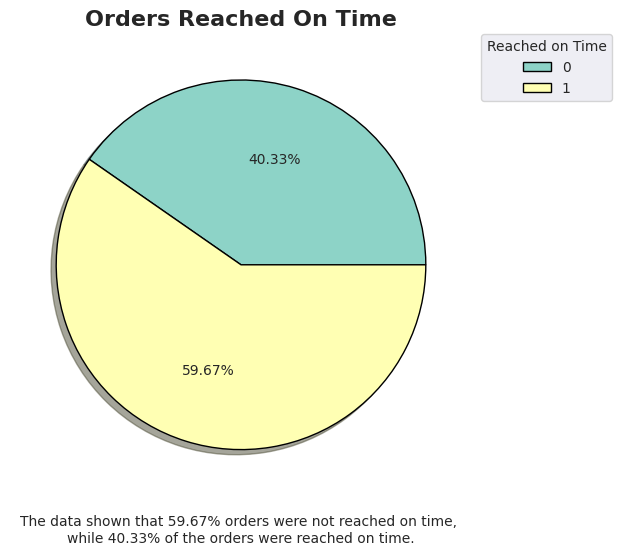

In [ ]:
df2 = pd.read_csv(url)
m = df2.groupby('Reached.on.Time_Y.N').agg({'ID' : 'nunique'}).reset_index()
m.columns = ['Reached on Time', 'Total Unique Customer']
fig = plt.figure(figsize=(6,6))
ax = plt.axes()
ax.pie(m['Total Unique Customer'], colors = sns.color_palette('Set3'), 
        wedgeprops = {'edgecolor':'k'}, autopct = '%.2f%%', shadow = True, startangle = 0)
ax.set_title('Orders Reached On Time', ha = 'center', fontsize = 16, fontweight='bold')

ax.text(x = 0, y = -1.5, s = 'The data shown that 59.67% orders were not reached on time, \nwhile 40.33% of the orders were reached on time.', 
         ha = 'center', fontsize = 10)
ax.legend(labels = m['Reached on Time'], title = 'Reached on Time', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

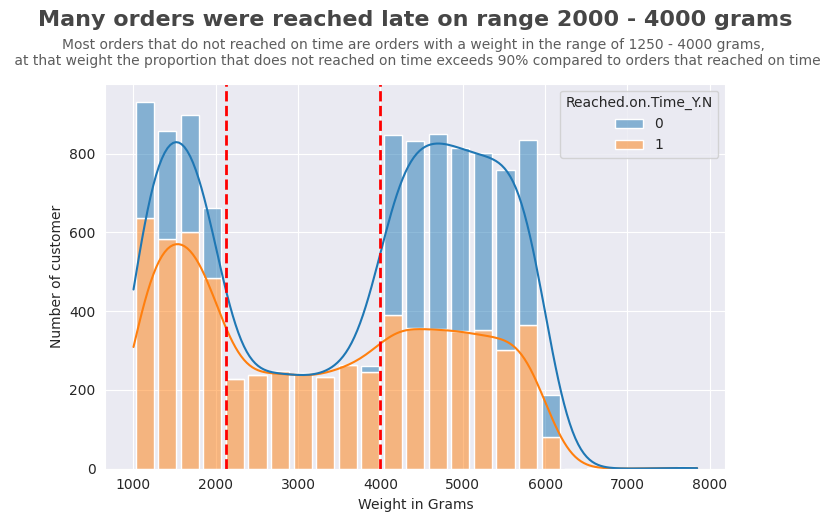

In [ ]:
# Create histplot
fig, ax = plt.subplots(1, 1, figsize = (8,5))

sns.histplot(x = 'Weight_in_gms', data = df, hue = 'Reached.on.Time_Y.N', 
             kde = True, multiple = 'stack', 
             bins = 25, shrink = 0.8, 
             ax = ax)

ax.set_ylabel('Number of customer')
ax.set_xlabel('Weight in Grams')
ax.axvline(2125, color = 'r', linestyle = '--', lw = 2)
ax.text(2125*1.1, 500, s='', weight = 'bold', alpha = 0.85)

ax.axvline(4000, color = 'r', linestyle = '--', lw = 2)
ax.text(4000*1.1, 500, s = '', weight = 'bold', alpha = 0.85)

Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.text((Xstart+Xend)/2, Yend*1.15, 'Many orders were reached late on range 2000 - 4000 grams', 
        ha = 'center', fontsize = 16, fontweight='bold', alpha = 0.85)

ax.text((Xstart+Xend)/2, Yend*1.12, "Most orders that do not reached on time are orders with a weight in the range of 1250 - 4000 grams, \n at that weight the proportion that does not reached on time exceeds 90% compared to orders that reached on time", 
        ha = 'center', va ='top', fontsize = 10, alpha = 0.75)

plt.show()

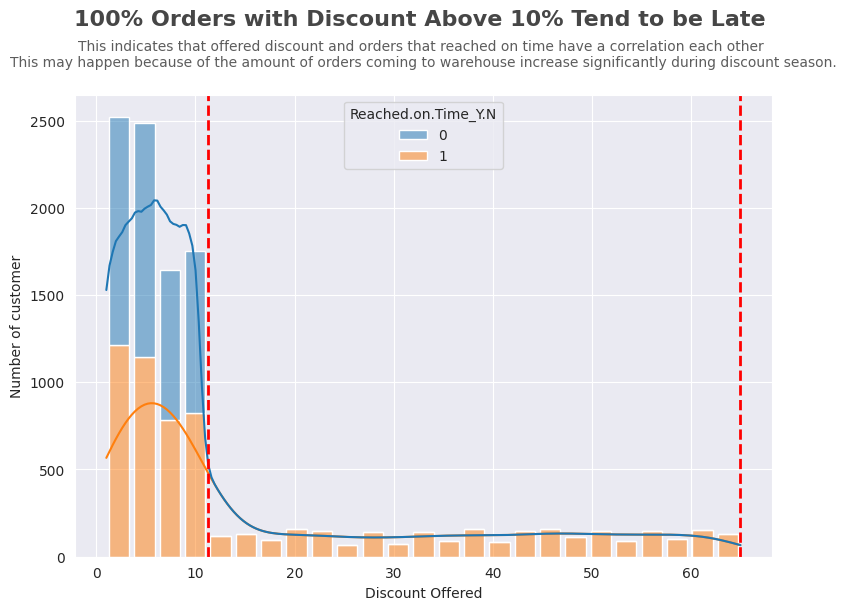

In [ ]:
# Create histplot
fig, ax = plt.subplots(1, 1, figsize = (9,6))

sns.histplot(x = 'Discount_offered', data = df, hue = 'Reached.on.Time_Y.N', 
             kde = True, multiple = 'stack', 
             bins = 25, shrink = 0.8, 
             ax = ax)

ax.set_ylabel('Number of customer')
ax.set_xlabel('Discount Offered')
ax.axvline(11.25, color = 'r', linestyle = '--', lw = 2)
ax.text(11.25*1.1, 500, s='', weight = 'bold', alpha = 0.85)

ax.axvline(65, color = 'r', linestyle = '--', lw = 2)
ax.text(65*1.1, 500, s = '', weight = 'bold', alpha = 0.85)

Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.text((Xstart+Xend)/2, Yend*1.15, '100% Orders with Discount Above 10% Tend to be Late ', 
        ha = 'center', fontsize = 16, fontweight='bold', alpha = 0.85)

ax.text((Xstart+Xend)/2, Yend*1.12, "This indicates that offered discount and orders that reached on time have a correlation each other \nThis may happen because of the amount of orders coming to warehouse increase significantly during discount season.", 
        ha = 'center', va ='top', fontsize = 10, alpha = 0.75)

plt.show()

## Business Recommendation
Secara garis besar, rekomendasi yang dapat diberikan dari bussiness insight di atas yaitu melakukan kerjasama dengan Fullfillment center.

* Hal ini dapat mengatasi permasalahan di antaranya terutama untuk order dengan berat 2000-4000 gram yang sering mengalami keterlambatan
* Selain itu kerjasama dengan Fullfillment center juga dapat membantu pengelolaan pengiriman pada periode 'big discount' yangmana dapat mengatasi keterlambatan yang terjadi untuk pembelian produk dengan discount lebih dari 10%
* Meningkatkan pemantauan pengiriman barang terlebih pada periode 'big discount' dan barang dengan berat kurang dari 4000 gram.

## Data Preprocessing

### Handle Missing Values

In [ ]:
df.isna().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

Tidak perlu dilakukan handle missing values karena semua feature tidak memiliki data yang kosong.

### Handle Duplicated Data

In [ ]:
df.duplicated().sum()

0

Tidak perlu handle duplicated data karena semua feature tidak memiliki data duplikat

### Feature Extraction

Fitur yang akan ditambahkan yaitu pembagian kelas pada berat barang, seberapa sering konsumen membeli barang, dan kelas pada harga barang, kelas discount, dan seberapa sering konsumen menelpon call center

#### weight_class

In [ ]:
def weight_class(x):
    if x['Weight_in_gms'] < 2000:
        res = 'light'
    elif x['Weight_in_gms'] < 4000:
        res = 'medium'
    else:
        res = 'heavy'
    return res

In [ ]:
df2 = df.copy()
df2['weight_class'] = df2.apply(lambda x: weight_class(x), axis=1)

#### frequent_buy

In [ ]:
def frequent_buy(x):
    if x['Prior_purchases'] <= 3:
        res = 'low'
    elif x['Prior_purchases'] <= 6:
        res = 'mid'
    else:
        res = 'high'
    return res

In [ ]:
df2['frequent_buy'] = df2.apply(lambda x: frequent_buy(x), axis=1)

#### price_class

In [ ]:
def price_class(x):
    if x['Cost_of_the_Product'] <= 175:
        res = 'cheap'
    elif x['Cost_of_the_Product'] <= 225:
        res = 'medium'
    else:
        res = 'expensive'
    return res

In [ ]:
df2['Price_class'] = df2.apply(lambda x: price_class(x), axis=1)

#### discount_class

In [ ]:
def discount_class(x):
    if x['Discount_offered'] <= 19:
        res = 'low'
    else:
        res = 'high'
    return res

In [ ]:
df2['Discount_class'] = df2.apply(lambda x: discount_class(x), axis=1)

#### frequent_call

In [ ]:
def frequent_call(x):
    if x['Customer_care_calls'] <= 3:
        res = 'seldom'
    elif x['Customer_care_calls'] <=5:
        res = 'rare'
    else:
      res = 'frequent'
    return res

In [ ]:
df2['Frequent_call'] = df2.apply(lambda x: frequent_call(x), axis=1)

### Feature Encoding

In [ ]:
df2.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N', 'weight_class', 'frequent_buy', 'Price_class',
       'Discount_class', 'Frequent_call'],
      dtype='object')

In [ ]:
cat_features = ['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Prior_purchases' ,
                'Customer_rating' ,'Product_importance', 'Gender','weight_class', 
                'frequent_buy','Price_class','Discount_class','Frequent_call']

df3 = df2.copy()

#---checking unique values for categorical features---
for cat in cat_features:
    print(cat, ':', set(df3[cat]))

Warehouse_block : {'C', 'B', 'A', 'F', 'D'}
Mode_of_Shipment : {'Road', 'Ship', 'Flight'}
Customer_care_calls : {2, 3, 4, 5, 6, 7}
Prior_purchases : {2, 3, 4, 5, 6, 7, 8, 10}
Customer_rating : {1, 2, 3, 4, 5}
Product_importance : {'high', 'low', 'medium'}
Gender : {'F', 'M'}
weight_class : {'light', 'heavy', 'medium'}
frequent_buy : {'high', 'low', 'mid'}
Price_class : {'cheap', 'expensive', 'medium'}
Discount_class : {'high', 'low'}
Frequent_call : {'frequent', 'rare', 'seldom'}


In [ ]:
#---checking column dtypes: object for OneHotEncoding using pd.get_dummies---
df3.dtypes

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
weight_class           object
frequent_buy           object
Price_class            object
Discount_class         object
Frequent_call          object
dtype: object

In [ ]:
#---One Hot Encoding---
df4 = pd.get_dummies(df3)
df4.head(2)

ID  Customer_care_calls  Customer_rating  Cost_of_the_Product  \
0   1                    4                2                  177   
1   2                    4                5                  216   

   Prior_purchases  Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  \
0                3                44           1233                    1   
1                2                59           3088                    1   

   Warehouse_block_A  Warehouse_block_B  ...  frequent_buy_low  \
0                  0                  0  ...                 1   
1                  0                  0  ...                 1   

   frequent_buy_mid  Price_class_cheap  Price_class_expensive  \
0                 0                  0                      0   
1                 0                  0                      0   

   Price_class_medium  Discount_class_high  Discount_class_low  \
0                   1                    1                   0   
1                   1                    1                   0   

   Frequent_call_frequent  Frequent_call_rare  Frequent_call_seldom  
0                       0                   1                     0  
1                       0                   1                     0  

[2 rows x 35 columns]

In [ ]:
#---melihat info setelah encoding---
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   ID                         10999 non-null  int64
 1   Customer_care_calls        10999 non-null  int64
 2   Customer_rating            10999 non-null  int64
 3   Cost_of_the_Product        10999 non-null  int64
 4   Prior_purchases            10999 non-null  int64
 5   Discount_offered           10999 non-null  int64
 6   Weight_in_gms              10999 non-null  int64
 7   Reached.on.Time_Y.N        10999 non-null  int64
 8   Warehouse_block_A          10999 non-null  uint8
 9   Warehouse_block_B          10999 non-null  uint8
 10  Warehouse_block_C          10999 non-null  uint8
 11  Warehouse_block_D          10999 non-null  uint8
 12  Warehouse_block_F          10999 non-null  uint8
 13  Mode_of_Shipment_Flight    10999 non-null  uint8
 14  Mode_of_Shipment_Road 

### Feature Selection

#### Correlation

In [ ]:
#---drop feature ID---
df4 = df4.drop('ID', axis=1)

<Axes: >

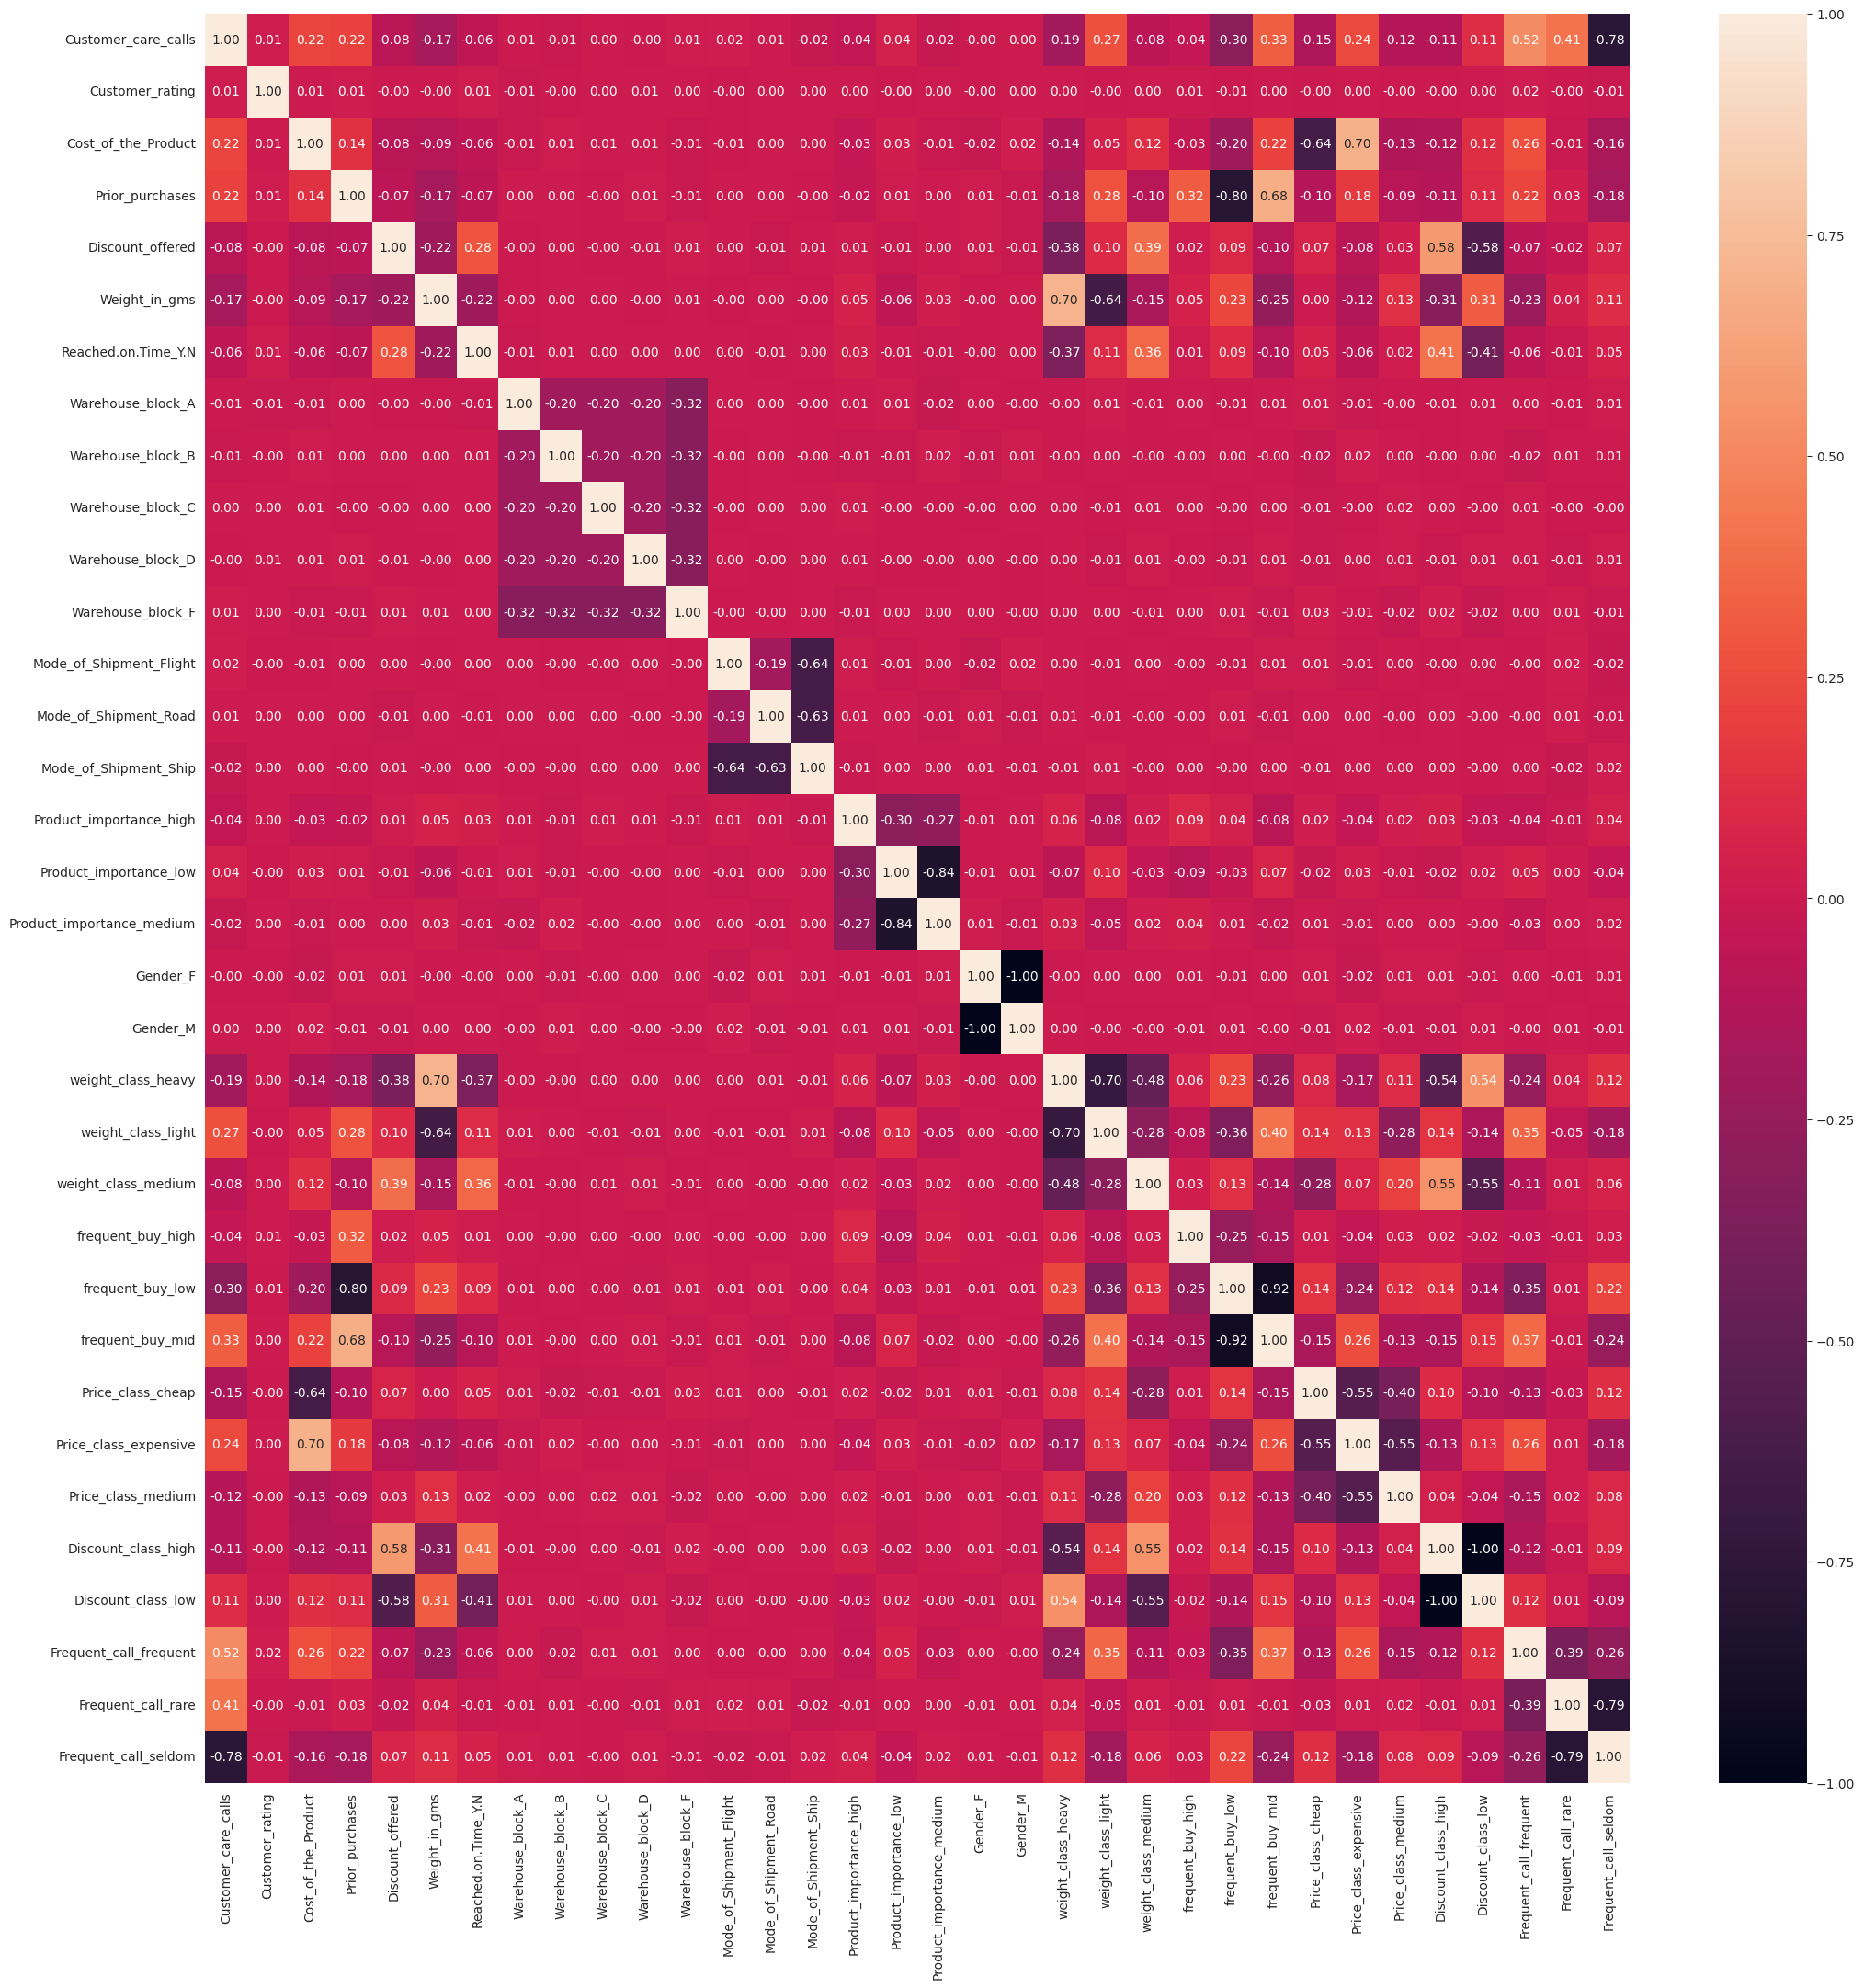

In [ ]:
#---melakukan cek korelasi fitur setelah encoding---
plt.figure(figsize=(25,25))
sns.heatmap(df4.corr(method = 'kendall'),  
            annot=True, 
            vmin=-1, vmax=1,
            fmt='.2f') 

- `Mode_of_Shipment_Flight` dan `Mode_of_Shipment_Road` memiliki korelasi yang cukup besar dengan `Mode_of_Shipment_Ship`namun masih di bawah 0.7 (belum termasuk redundant)


#### Chi-Square Test

In [ ]:
def chi2(df, col1, col2):    
    #---create the contingency table---
    df_crosstab= pd.crosstab(index = df[col1], columns = df[col2])
    
    #---calculate degree of freedom---
    degree_f = (df_crosstab.shape[0]-1) * (df_crosstab.shape[1]-1)
    
    #---sum up the totals for row and columns---
    df_crosstab.loc[:,'Total']= df_crosstab.sum(axis=1)
    df_crosstab.loc['Total']= df_crosstab.sum()
    
    #---create the expected value dataframe---
    df_exp = df_crosstab.copy()    
    df_exp.iloc[:,:] = np.multiply.outer(
        df_crosstab.sum(1).values,df_crosstab.sum().values) / df_crosstab.sum().sum()            
    
    # calculate chi-square values
    df_chi2 = ((df_crosstab - df_exp)**2) / df_exp    
    df_chi2.loc[:,'Total']= df_chi2.sum(axis=1)
    df_chi2.loc['Total']= df_chi2.sum()
    
    #---get chi-square score---   
    chi_square_score = df_chi2.iloc[:-1,:-1].sum().sum()
    
    #---calculate the p-value---
    from scipy import stats
    from scipy.stats import chi2
    alpha=0.05
    p = stats.distributions.chi2.sf(chi_square_score, degree_f)
    critical_value=chi2.ppf(q=1-alpha,df=degree_f)
    
    print ('chi_square:',chi_square_score)
    print ('critical_value:',critical_value)
    print ('Df:', degree_f)
    print ('p-value:',p)
    print ('alpha:',alpha)
    print ('')
    print ('**Kesimpulan**')
    if p<=alpha:
        print('Reject H0, There is a relationship between variable', col1, 'and Reached On Time (Target Variable)')
    else:
        print('Retain H0, There is no relationship between variable', col1, 'and Reached On Time (Target Variable)') 
    return

##### weight_class

In [ ]:
print('weight_class_heavy:')
print(chi2(df4, 'weight_class_heavy', 'Reached.on.Time_Y.N'))
print ('')
print('weight_class_light:')
print(chi2(df4, 'weight_class_light', 'Reached.on.Time_Y.N'))
print ('')
print('weight_class_medium:')
print(chi2(df4, 'weight_class_medium', 'Reached.on.Time_Y.N'))

weight_class_heavy:
chi_square: 1471.0700378256506
critical_value: 3.841458820694124
Df: 1
p-value: 0.0
alpha: 0.05

**Kesimpulan**
Reject H0, There is a relationship between variable weight_class_heavy and Reached On Time (Target Variable)
None

weight_class_light:
chi_square: 125.85298566540008
critical_value: 3.841458820694124
Df: 1
p-value: 3.3112722771634384e-29
alpha: 0.05

**Kesimpulan**
Reject H0, There is a relationship between variable weight_class_light and Reached On Time (Target Variable)
None

weight_class_medium:
chi_square: 1437.0544913733247
critical_value: 3.841458820694124
Df: 1
p-value: 0.0
alpha: 0.05

**Kesimpulan**
Reject H0, There is a relationship between variable weight_class_medium and Reached On Time (Target Variable)
None


<ipython-input-139-459364b99608>:14: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_exp.iloc[:,:] = np.multiply.outer(
<ipython-input-139-459364b99608>:14: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_exp.iloc[:,:] = np.multiply.outer(
<ipython-input-139-459364b99608>:14: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newval

##### frequent_buy

In [ ]:
print('frequent_buy_high:')
print(chi2(df4, 'frequent_buy_high', 'Reached.on.Time_Y.N'))
print ('')
print('frequent_buy_mid:')
print(chi2(df4, 'frequent_buy_mid', 'Reached.on.Time_Y.N'))
print ('')
print('frequent_buy_low:')
print(chi2(df4, 'frequent_buy_low', 'Reached.on.Time_Y.N'))

frequent_buy_high:


<ipython-input-139-459364b99608>:14: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_exp.iloc[:,:] = np.multiply.outer(


chi_square: 1.7229398506488949
critical_value: 3.841458820694124
Df: 1
p-value: 0.189315061068645
alpha: 0.05

**Kesimpulan**
Retain H0, There is no relationship between variable frequent_buy_high and Reached On Time (Target Variable)
None

frequent_buy_mid:
chi_square: 111.64725256783964
critical_value: 3.841458820694124
Df: 1
p-value: 4.2689079190632797e-26
alpha: 0.05

**Kesimpulan**
Reject H0, There is a relationship between variable frequent_buy_mid and Reached On Time (Target Variable)
None

frequent_buy_low:
chi_square: 96.71749887551961
critical_value: 3.841458820694124
Df: 1
p-value: 7.995943350622814e-23
alpha: 0.05

**Kesimpulan**
Reject H0, There is a relationship between variable frequent_buy_low and Reached On Time (Target Variable)
None


<ipython-input-139-459364b99608>:14: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_exp.iloc[:,:] = np.multiply.outer(
<ipython-input-139-459364b99608>:14: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_exp.iloc[:,:] = np.multiply.outer(


##### Price_class

In [ ]:
print('Price_class_cheap:')
print(chi2(df4, 'Price_class_cheap', 'Reached.on.Time_Y.N'))
print ('')
print('Price_class_expensive:')
print(chi2(df4, 'Price_class_expensive', 'Reached.on.Time_Y.N'))
print ('')
print('Price_class_medium:')
print(chi2(df4, 'Price_class_medium', 'Reached.on.Time_Y.N'))

Price_class_cheap:


<ipython-input-139-459364b99608>:14: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_exp.iloc[:,:] = np.multiply.outer(
<ipython-input-139-459364b99608>:14: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_exp.iloc[:,:] = np.multiply.outer(


chi_square: 28.537559335750746
critical_value: 3.841458820694124
Df: 1
p-value: 9.189839470478057e-08
alpha: 0.05

**Kesimpulan**
Reject H0, There is a relationship between variable Price_class_cheap and Reached On Time (Target Variable)
None

Price_class_expensive:
chi_square: 45.07539253941223
critical_value: 3.841458820694124
Df: 1
p-value: 1.8959285669133962e-11
alpha: 0.05

**Kesimpulan**
Reject H0, There is a relationship between variable Price_class_expensive and Reached On Time (Target Variable)
None

Price_class_medium:
chi_square: 4.127507489520868
critical_value: 3.841458820694124
Df: 1
p-value: 0.042191450581964204
alpha: 0.05

**Kesimpulan**
Reject H0, There is a relationship between variable Price_class_medium and Reached On Time (Target Variable)
None


<ipython-input-139-459364b99608>:14: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_exp.iloc[:,:] = np.multiply.outer(


##### Discount_class

In [ ]:
print('Discount_class_high:')
print(chi2(df4, 'Discount_class_high', 'Reached.on.Time_Y.N'))
print ('')
print('Discount_class_low:')
print(chi2(df4, 'Discount_class_low', 'Reached.on.Time_Y.N'))

Discount_class_high:
chi_square: 1868.3110226825775
critical_value: 3.841458820694124
Df: 1
p-value: 0.0
alpha: 0.05

**Kesimpulan**
Reject H0, There is a relationship between variable Discount_class_high and Reached On Time (Target Variable)
None

Discount_class_low:
chi_square: 1868.3110226825775
critical_value: 3.841458820694124
Df: 1
p-value: 0.0
alpha: 0.05

**Kesimpulan**
Reject H0, There is a relationship between variable Discount_class_low and Reached On Time (Target Variable)
None


<ipython-input-139-459364b99608>:14: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_exp.iloc[:,:] = np.multiply.outer(
<ipython-input-139-459364b99608>:14: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_exp.iloc[:,:] = np.multiply.outer(


##### Frequent_call

In [ ]:
print('Frequent_call_frequent:')
print(chi2(df4, 'Frequent_call_frequent', 'Reached.on.Time_Y.N'))
print ('')
print('Frequent_call_rare:')
print(chi2(df4, 'Frequent_call_rare', 'Reached.on.Time_Y.N'))
print ('')
print('Frequent_call_seldom:')
print(chi2(df4, 'Frequent_call_seldom', 'Reached.on.Time_Y.N'))

Frequent_call_frequent:
chi_square: 38.19700169410788
critical_value: 3.841458820694124
Df: 1
p-value: 6.39506101451933e-10
alpha: 0.05

**Kesimpulan**
Reject H0, There is a relationship between variable Frequent_call_frequent and Reached On Time (Target Variable)
None

Frequent_call_rare:


<ipython-input-139-459364b99608>:14: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_exp.iloc[:,:] = np.multiply.outer(


chi_square: 0.989381429580951
critical_value: 3.841458820694124
Df: 1
p-value: 0.3198936055075997
alpha: 0.05

**Kesimpulan**
Retain H0, There is no relationship between variable Frequent_call_rare and Reached On Time (Target Variable)
None



<ipython-input-139-459364b99608>:14: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_exp.iloc[:,:] = np.multiply.outer(
<ipython-input-139-459364b99608>:14: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_exp.iloc[:,:] = np.multiply.outer(


Frequent_call_seldom:
chi_square: 26.66542886085911
critical_value: 3.841458820694124
Df: 1
p-value: 2.419113142031896e-07
alpha: 0.05

**Kesimpulan**
Reject H0, There is a relationship between variable Frequent_call_seldom and Reached On Time (Target Variable)
None


##### Customer_rating

In [ ]:
print('Customer_rating:')
print(chi2(df4, 'Customer_rating', 'Reached.on.Time_Y.N'))

Customer_rating:
chi_square: 3.200045474831146
critical_value: 9.487729036781154
Df: 4
p-value: 0.5249236018493662
alpha: 0.05

**Kesimpulan**
Retain H0, There is no relationship between variable Customer_rating and Reached On Time (Target Variable)
None


<ipython-input-139-459364b99608>:14: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_exp.iloc[:,:] = np.multiply.outer(


##### Product_importance

In [ ]:
print('Product_importance_high:')
print(chi2(df4, 'Product_importance_high', 'Reached.on.Time_Y.N'))
print ('')
print('Product_importance_medium:')
print(chi2(df4, 'Product_importance_medium', 'Reached.on.Time_Y.N'))
print ('')
print('Product_importance_low:')
print(chi2(df4, 'Product_importance_low', 'Reached.on.Time_Y.N'))

Product_importance_high:
chi_square: 12.154243890098336
critical_value: 3.841458820694124
Df: 1
p-value: 0.0004897629421520391
alpha: 0.05

**Kesimpulan**
Reject H0, There is a relationship between variable Product_importance_high and Reached On Time (Target Variable)
None

Product_importance_medium:


<ipython-input-139-459364b99608>:14: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_exp.iloc[:,:] = np.multiply.outer(


chi_square: 1.3549577235257604
critical_value: 3.841458820694124
Df: 1
p-value: 0.24441326732096363
alpha: 0.05

**Kesimpulan**
Retain H0, There is no relationship between variable Product_importance_medium and Reached On Time (Target Variable)
None

Product_importance_low:
chi_square: 0.6465406149631274
critical_value: 3.841458820694124
Df: 1
p-value: 0.42135222199455724
alpha: 0.05

**Kesimpulan**
Retain H0, There is no relationship between variable Product_importance_low and Reached On Time (Target Variable)
None


<ipython-input-139-459364b99608>:14: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_exp.iloc[:,:] = np.multiply.outer(
<ipython-input-139-459364b99608>:14: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_exp.iloc[:,:] = np.multiply.outer(


##### Warehouse_block

In [ ]:
print('Warehouse_block_A:')
print(chi2(df4, 'Warehouse_block_A', 'Reached.on.Time_Y.N'))
print ('')
print('Warehouse_block_B:')
print(chi2(df4, 'Warehouse_block_B', 'Reached.on.Time_Y.N'))
print ('')
print('Warehouse_block_C:')
print(chi2(df4, 'Warehouse_block_C', 'Reached.on.Time_Y.N'))
print ('')
print('Warehouse_block_D:')
print(chi2(df4, 'Warehouse_block_D', 'Reached.on.Time_Y.N'))
print ('')
print('Warehouse_block_F:')
print(chi2(df4, 'Warehouse_block_F', 'Reached.on.Time_Y.N'))

Warehouse_block_A:


<ipython-input-139-459364b99608>:14: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_exp.iloc[:,:] = np.multiply.outer(
<ipython-input-139-459364b99608>:14: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_exp.iloc[:,:] = np.multiply.outer(


chi_square: 0.9547266416259537
critical_value: 3.841458820694124
Df: 1
p-value: 0.32851908247640493
alpha: 0.05

**Kesimpulan**
Retain H0, There is no relationship between variable Warehouse_block_A and Reached On Time (Target Variable)
None

Warehouse_block_B:
chi_square: 0.28670522310900537
critical_value: 3.841458820694124
Df: 1
p-value: 0.5923396784284196
alpha: 0.05

**Kesimpulan**
Retain H0, There is no relationship between variable Warehouse_block_B and Reached On Time (Target Variable)
None

Warehouse_block_C:


<ipython-input-139-459364b99608>:14: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_exp.iloc[:,:] = np.multiply.outer(
<ipython-input-139-459364b99608>:14: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_exp.iloc[:,:] = np.multiply.outer(


chi_square: 0.00019264706075752407
critical_value: 3.841458820694124
Df: 1
p-value: 0.9889259288100141
alpha: 0.05

**Kesimpulan**
Retain H0, There is no relationship between variable Warehouse_block_C and Reached On Time (Target Variable)
None

Warehouse_block_D:
chi_square: 0.007578223784038303
critical_value: 3.841458820694124
Df: 1
p-value: 0.9306293887394124
alpha: 0.05

**Kesimpulan**
Retain H0, There is no relationship between variable Warehouse_block_D and Reached On Time (Target Variable)
None

Warehouse_block_F:
chi_square: 0.07254616869744701
critical_value: 3.841458820694124
Df: 1
p-value: 0.787665006584705
alpha: 0.05

**Kesimpulan**
Retain H0, There is no relationship between variable Warehouse_block_F and Reached On Time (Target Variable)
None


<ipython-input-139-459364b99608>:14: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_exp.iloc[:,:] = np.multiply.outer(


##### Mode_of_Shipment

In [ ]:
print('Mode_of_Shipment_Flight:')
print(chi2(df4, 'Mode_of_Shipment_Flight', 'Reached.on.Time_Y.N'))
print ('')
print('Mode_of_Shipment_Road:')
print(chi2(df4, 'Mode_of_Shipment_Road', 'Reached.on.Time_Y.N'))
print ('')
print('Mode_of_Shipment_Ship:')
print(chi2(df4, 'Mode_of_Shipment_Ship', 'Reached.on.Time_Y.N'))

Mode_of_Shipment_Flight:
chi_square: 0.21017039250128794
critical_value: 3.841458820694124
Df: 1
p-value: 0.6466338849017836
alpha: 0.05

**Kesimpulan**
Retain H0, There is no relationship between variable Mode_of_Shipment_Flight and Reached On Time (Target Variable)
None

Mode_of_Shipment_Road:


<ipython-input-139-459364b99608>:14: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_exp.iloc[:,:] = np.multiply.outer(


chi_square: 0.6473100635970501
critical_value: 3.841458820694124
Df: 1
p-value: 0.421076046846654
alpha: 0.05

**Kesimpulan**
Retain H0, There is no relationship between variable Mode_of_Shipment_Road and Reached On Time (Target Variable)
None

Mode_of_Shipment_Ship:
chi_square: 0.07304509427360045
critical_value: 3.841458820694124
Df: 1
p-value: 0.7869536514453884
alpha: 0.05

**Kesimpulan**
Retain H0, There is no relationship between variable Mode_of_Shipment_Ship and Reached On Time (Target Variable)
None


<ipython-input-139-459364b99608>:14: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_exp.iloc[:,:] = np.multiply.outer(
<ipython-input-139-459364b99608>:14: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_exp.iloc[:,:] = np.multiply.outer(


##### Gender

In [ ]:
print('Gender_F:')
print(chi2(df4, 'Gender_F', 'Reached.on.Time_Y.N'))
print ('')
print('Gender_M:')
print(chi2(df4, 'Gender_M', 'Reached.on.Time_Y.N'))

<ipython-input-139-459364b99608>:14: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_exp.iloc[:,:] = np.multiply.outer(


Gender_F:
chi_square: 0.2418189825019984
critical_value: 3.841458820694124
Df: 1
p-value: 0.6228954255886712
alpha: 0.05

**Kesimpulan**
Retain H0, There is no relationship between variable Gender_F and Reached On Time (Target Variable)
None

Gender_M:
chi_square: 0.2418189825019984
critical_value: 3.841458820694124
Df: 1
p-value: 0.6228954255886712
alpha: 0.05

**Kesimpulan**
Retain H0, There is no relationship between variable Gender_M and Reached On Time (Target Variable)
None


<ipython-input-139-459364b99608>:14: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_exp.iloc[:,:] = np.multiply.outer(


##### **Kesimpulan Chi-Square Test:**
Berdasarkan CHi-Square Test di atas disimpulkan bahwa yang berpengaruh terhadap variabel target (Reached on Time) adalah 
1. weight_class_heavy
2. weight_class_light
3. weight_class_medium
4. frequent_buy_mid
5. frequent_buy_low
6. Price_class_cheap
7. Price_class_expensive
8. Price_class_medium
9. Discount_class_high
10. Discount_class_low
11. Frequent_call_frequent
12. Frequent_call_seldom 
13. Product_importance_high

Sedangkan feature yang tidak berpengaruh terhadap variabel target adalah:
1. frequent_buy_high
2. Frequent_call_rare
3. Customer_rating
4. Product_importance_medium
5. Product_importance_low
6. Warehouse_block_A
7. Warehouse_block_B
8. Warehouse_block_C
9. Warehouse_block_D
10. Warehouse_block_F
11. Mode_of_Shipment_Flight
12. Mode_of_Shipment_Road
13. Mode_of_Shipment_Ship
14. Gender_F
15. Gender_M







#### Kesimpulan Feature Selection





In [ ]:
#---drop feature dengan tipe data numerik---
drop_columns = ['Customer_care_calls', 'Weight_in_gms', 'Discount_offered', 'Prior_purchases', 'Customer_care_calls', 'Cost_of_the_Product']
df5 = df4.drop(drop_columns, axis=1)

In [ ]:
df5.columns

Index(['Customer_rating', 'Reached.on.Time_Y.N', 'Warehouse_block_A',
       'Warehouse_block_B', 'Warehouse_block_C', 'Warehouse_block_D',
       'Warehouse_block_F', 'Mode_of_Shipment_Flight', 'Mode_of_Shipment_Road',
       'Mode_of_Shipment_Ship', 'Product_importance_high',
       'Product_importance_low', 'Product_importance_medium', 'Gender_F',
       'Gender_M', 'weight_class_heavy', 'weight_class_light',
       'weight_class_medium', 'frequent_buy_high', 'frequent_buy_low',
       'frequent_buy_mid', 'Price_class_cheap', 'Price_class_expensive',
       'Price_class_medium', 'Discount_class_high', 'Discount_class_low',
       'Frequent_call_frequent', 'Frequent_call_rare', 'Frequent_call_seldom'],
      dtype='object')

In [ ]:
# pemisahan features vs target
X = df5.drop(columns='Reached.on.Time_Y.N')
y = df5['Reached.on.Time_Y.N'].values

print(X.shape)
print(y.shape)

(10999, 28)
(10999,)


In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

#---selecting best features with SelectKBest chi2 k=13---
bestfeatures = SelectKBest(score_func=chi2, k=13)
fit = bestfeatures.fit_transform(X, y)

print("After selecting best 13 features:", fit.shape) 
print("")

filter = bestfeatures.get_support()
features = X.columns

print("All features:")
print(features)
print("")
print("Selected best 13:")
print(features[filter])

After selecting best 13 features: (10999, 13)

All features:
Index(['Customer_rating', 'Warehouse_block_A', 'Warehouse_block_B',
       'Warehouse_block_C', 'Warehouse_block_D', 'Warehouse_block_F',
       'Mode_of_Shipment_Flight', 'Mode_of_Shipment_Road',
       'Mode_of_Shipment_Ship', 'Product_importance_high',
       'Product_importance_low', 'Product_importance_medium', 'Gender_F',
       'Gender_M', 'weight_class_heavy', 'weight_class_light',
       'weight_class_medium', 'frequent_buy_high', 'frequent_buy_low',
       'frequent_buy_mid', 'Price_class_cheap', 'Price_class_expensive',
       'Price_class_medium', 'Discount_class_high', 'Discount_class_low',
       'Frequent_call_frequent', 'Frequent_call_rare', 'Frequent_call_seldom'],
      dtype='object')

Selected best 13:
Index(['Product_importance_high', 'weight_class_heavy', 'weight_class_light',
       'weight_class_medium', 'frequent_buy_low', 'frequent_buy_mid',
       'Price_class_cheap', 'Price_class_expensive', 'Price

- Berdasarkan CHi-Square Test di atas disimpulkan bahwa yang berpengaruh terhadap variabel target (Reached on Time) yaitu sebanyak 13 dari 28 prediktor.
- Hasil yang sama juga didapatkan dengan menggunakan metode SelectKBest dari library sklearn.feature_selection
- Sehingga selain 13 fitur yang berhubungan dengan target akan dilakukan eksperimen dengan mengevaluasi hasil model jika fitur tersebut dilakukan drop dan tidak.

### Handling Outliers

- Data keseluruhan pada fitur yang memiliki outlier dianggap penting sehingga outlier tidak perlu dihapuskan 
- Fitur dengan data outlier sebelumnya sudah dilakukan feature extraction dengan mengubah data menjadi data kategorik sehingga tidak terdapat outlier

### Data Training and Testing Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8249, 28)
(8249,)
(2750, 28)
(2750,)


### Feature Transformation 

- Setelah dilakukan feature extraction dan encoding, feature transformation tidak dilakukan karena semua data sudah memiliki skala yang sama yaitu 0 dan 1, serta semua fitur sudah berbentuk kategorik

### Handling Class Imbalance on Data Training

In [ ]:
# Reached.on.Time_Y.N Feature unique values sum after data split train/test
print(f'Value counts Reached.on.Time_Y.N column:')
print(pd.Series(y_train).value_counts())

total = pd.Series(y_train).value_counts().sum()

print(f'''Reached on time: Yes percentage: {round(pd.Series(y_train).value_counts()[0]/total * 100, 2)}%''')
print(f'''Reached on time: No percentage: {round(pd.Series(y_train).value_counts()[1]/total * 100, 2)}%''')

Value counts Reached.on.Time_Y.N column:
1    4913
0    3336
dtype: int64
Reached on time: Yes percentage: 40.44%
Reached on time: No percentage: 59.56%


- Distribusi nilai unik pada fitur target `Reached.on.Time_Y.N` yaitu sebanyak 59.56% data '1' dan 40.44% data '0' sehingga masih termasuk Balanced 
- Best practice untuk handling imbalance data adalah ketika data target memiliki proporsi 70:30 atau 80:20. Pada dataset ini data target masih berada pada threshold 60:40, sehingga direncanakan akan dilakukan experiment antara melakukan handling dan tidak handling imbalance data, sehingga hasil yang lebih baik yang akan digunakan.
- Untuk mengatasi class imbalance pada dataset ini direncanakan menggunakan algoritma oversampling SMOTE sehingga data sintetis dapat dibuat di antara kelas minoritas menggunakan interpolasi antar titik-titik data.

In [ ]:
X_train.columns

Index(['Customer_rating', 'Warehouse_block_A', 'Warehouse_block_B',
       'Warehouse_block_C', 'Warehouse_block_D', 'Warehouse_block_F',
       'Mode_of_Shipment_Flight', 'Mode_of_Shipment_Road',
       'Mode_of_Shipment_Ship', 'Product_importance_high',
       'Product_importance_low', 'Product_importance_medium', 'Gender_F',
       'Gender_M', 'weight_class_heavy', 'weight_class_light',
       'weight_class_medium', 'frequent_buy_high', 'frequent_buy_low',
       'frequent_buy_mid', 'Price_class_cheap', 'Price_class_expensive',
       'Price_class_medium', 'Discount_class_high', 'Discount_class_low',
       'Frequent_call_frequent', 'Frequent_call_rare', 'Frequent_call_seldom'],
      dtype='object')

- sebelum dilakukan under/oversampling, perlu dilakukan pemisahan data target dan fitur kemudian data training dan data testing
- undersampling/oversampling hanya akan dilakukan pada data training (bukan data testing), karena ditakutkan terjadi data leaking/kebocoran data jika dilakukan handling class imbalance pada data testing 

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8249 entries, 1463 to 7270
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Customer_rating            8249 non-null   int64
 1   Warehouse_block_A          8249 non-null   uint8
 2   Warehouse_block_B          8249 non-null   uint8
 3   Warehouse_block_C          8249 non-null   uint8
 4   Warehouse_block_D          8249 non-null   uint8
 5   Warehouse_block_F          8249 non-null   uint8
 6   Mode_of_Shipment_Flight    8249 non-null   uint8
 7   Mode_of_Shipment_Road      8249 non-null   uint8
 8   Mode_of_Shipment_Ship      8249 non-null   uint8
 9   Product_importance_high    8249 non-null   uint8
 10  Product_importance_low     8249 non-null   uint8
 11  Product_importance_medium  8249 non-null   uint8
 12  Gender_F                   8249 non-null   uint8
 13  Gender_M                   8249 non-null   uint8
 14  weight_class_heavy   

In [ ]:
#---handling imbalance class with SMOTE---
from imblearn import under_sampling, over_sampling

X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE().fit_resample(X_train, y_train)

In [ ]:
print('Original (y Train)')
print(pd.Series(y_train).value_counts())
print('\n')
print('y SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())
print('\n')
print('Original (X Train)')
print(X_train.shape)
print('\n')
print('X SMOTE')
print(X_over_SMOTE.shape)

Original (y Train)
1    4913
0    3336
dtype: int64


y SMOTE
1    4913
0    4913
dtype: int64


Original (X Train)
(8249, 28)


X SMOTE
(9826, 28)
